In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# EDA

In [2]:
# importing the csv file

dataset = pd.read_csv(r'C:\Users\91976\Desktop\programming\AI and Ml\projects\survival predicton\test\Dataset.csv')

# size and shape of the dataset
print(dataset.shape)
print(f"size = {dataset.shape[0]*dataset.shape[1]}")

(91713, 186)
size = 17058618


missing values

In [3]:
features_with_nan = [features for features in dataset.columns if dataset[features].isnull().sum()>=1]

for features in features_with_nan:
    print(features , np.round(dataset[features].isnull().mean(),4) , '% missing values')

print(len(features_with_nan))    

age 0.0461 % missing values
bmi 0.0374 % missing values
ethnicity 0.0152 % missing values
gender 0.0003 % missing values
height 0.0145 % missing values
hospital_admit_source 0.2334 % missing values
icu_admit_source 0.0012 % missing values
weight 0.0297 % missing values
albumin_apache 0.5929 % missing values
apache_2_diagnosis 0.0181 % missing values
apache_3j_diagnosis 0.012 % missing values
arf_apache 0.0078 % missing values
bilirubin_apache 0.6339 % missing values
bun_apache 0.21 % missing values
creatinine_apache 0.2056 % missing values
fio2_apache 0.7727 % missing values
gcs_eyes_apache 0.0207 % missing values
gcs_motor_apache 0.0207 % missing values
gcs_unable_apache 0.0113 % missing values
gcs_verbal_apache 0.0207 % missing values
glucose_apache 0.1203 % missing values
heart_rate_apache 0.0096 % missing values
hematocrit_apache 0.2167 % missing values
intubated_apache 0.0078 % missing values
map_apache 0.0108 % missing values
paco2_apache 0.7727 % missing values
paco2_for_ph_apac

numerical values

In [4]:
numerical_features=[features for features in dataset.columns if dataset[features].dtype!='O']

print('Number of numerical features' , len(numerical_features))

Number of numerical features 178


In [5]:
# discrete features

discrete_features = [features for features in numerical_features if len(dataset[features].unique())<=10 and features not in ['encounter_id','patient_id']]

print('discrete features', len(discrete_features))
print(discrete_features)


discrete features 19
['hospital_death', 'elective_surgery', 'readmission_status', 'apache_post_operative', 'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'intubated_apache', 'ventilated_apache', 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis']


In [6]:
# continous features

continous_features = [features for features in numerical_features if features not in discrete_features and features not in ['encounter_id','patient_id']] 

print("continous features" , len(continous_features))

continous features 157


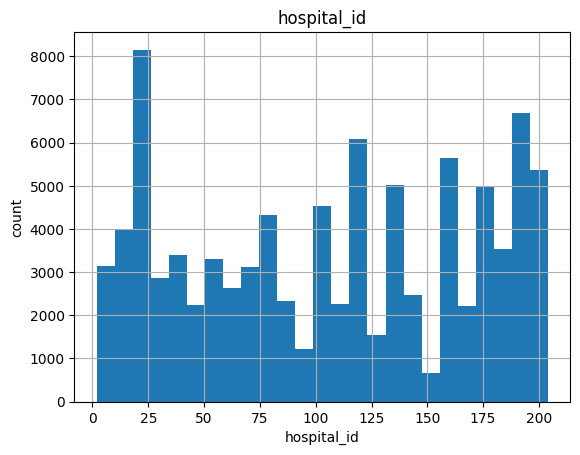

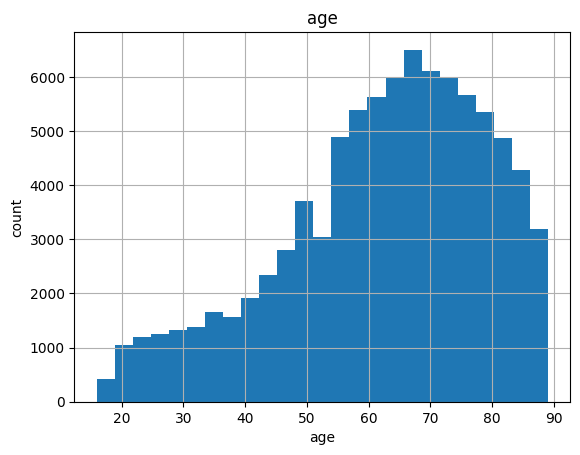

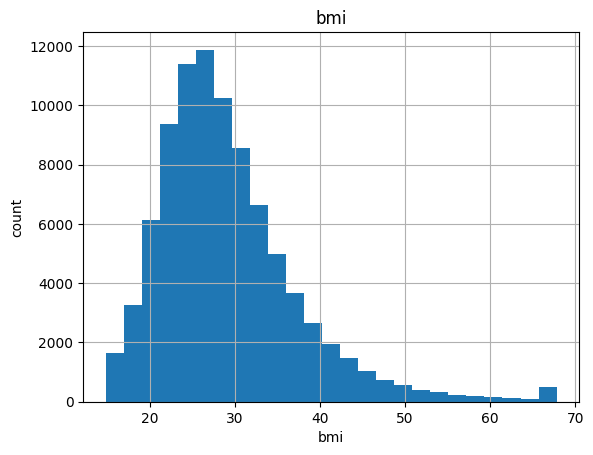

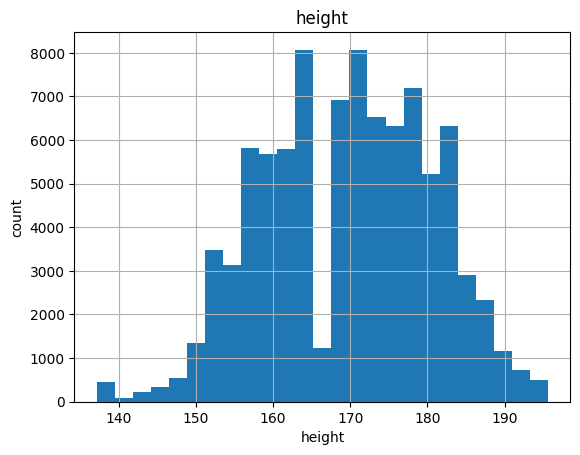

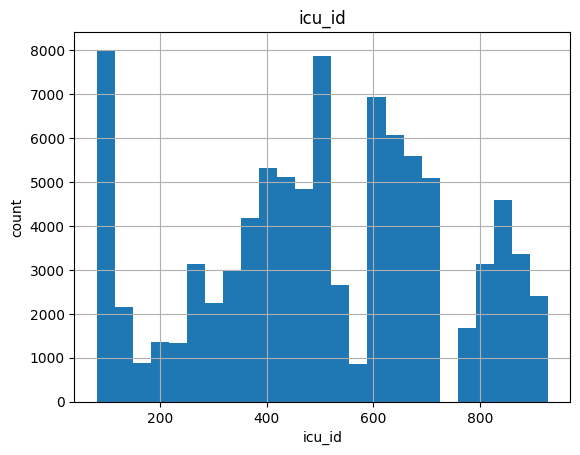

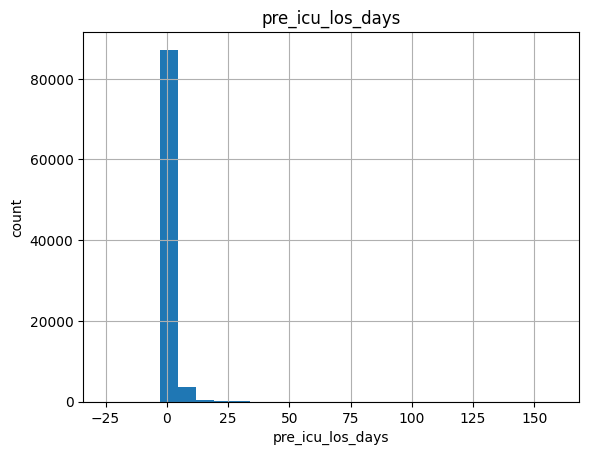

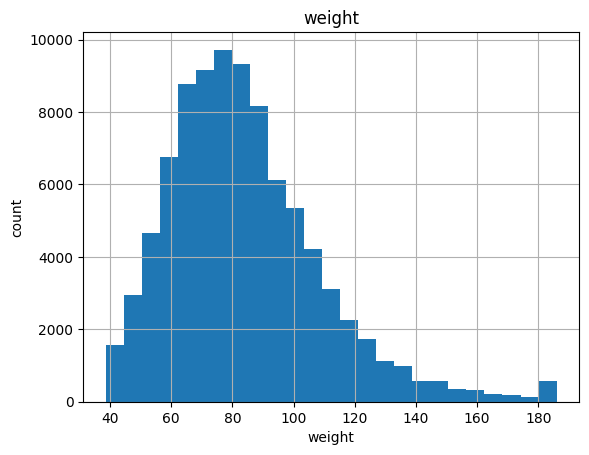

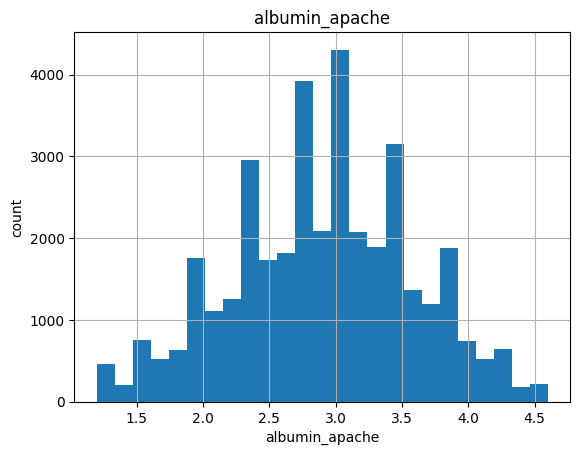

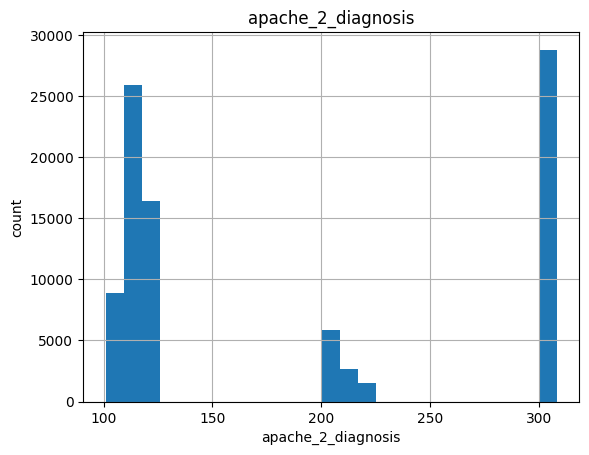

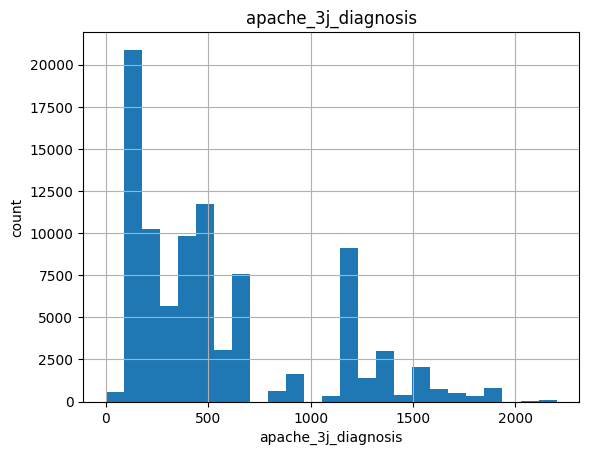

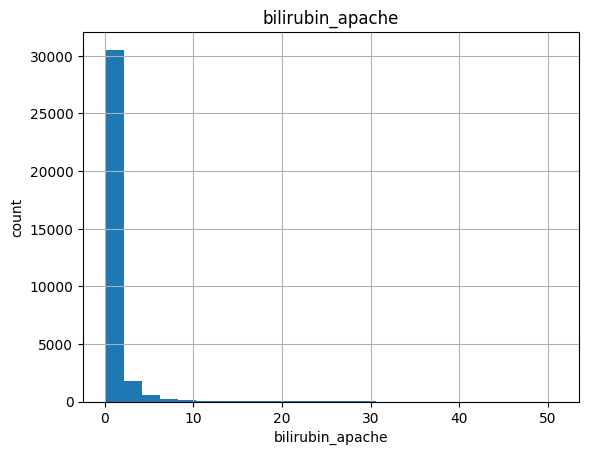

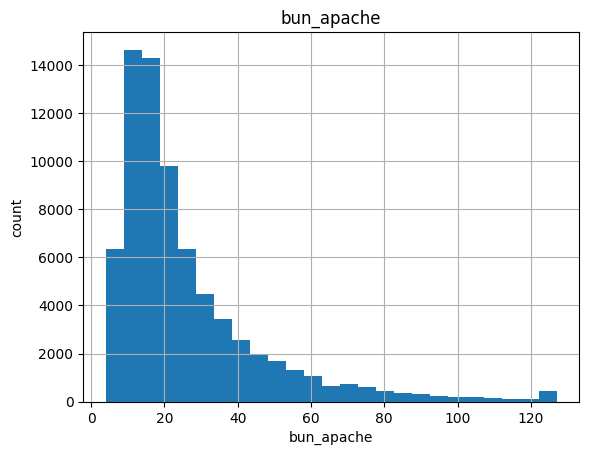

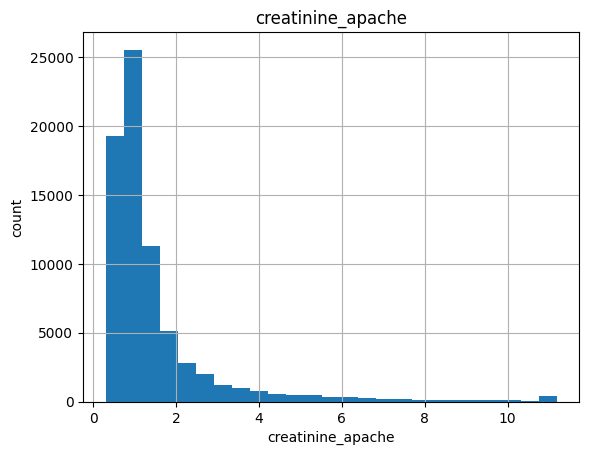

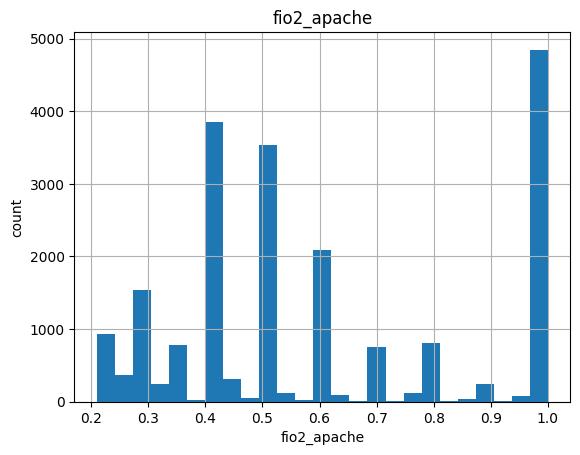

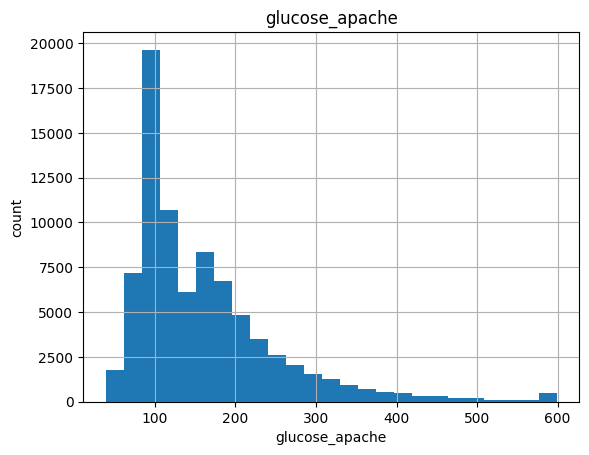

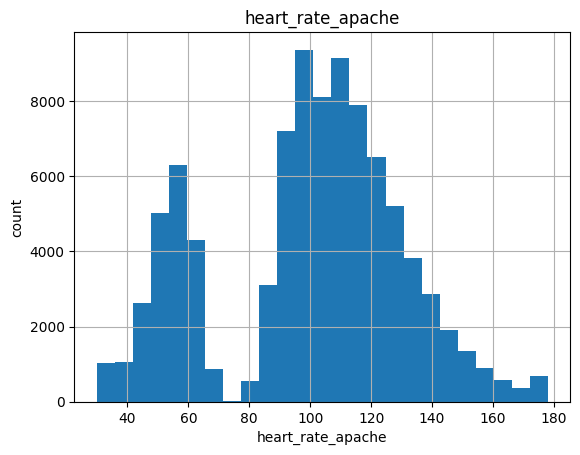

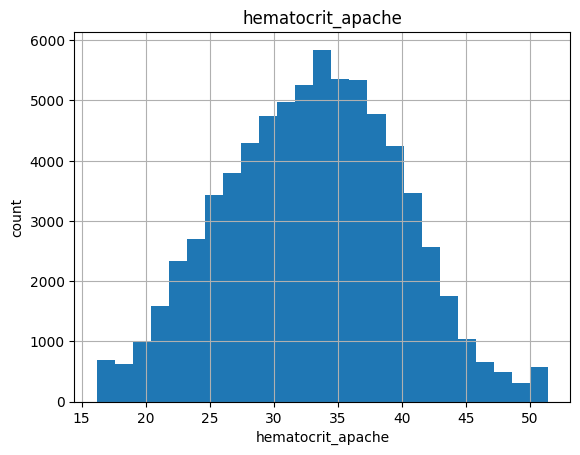

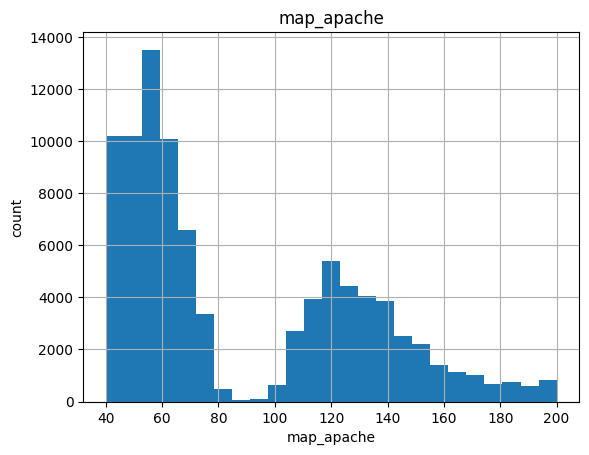

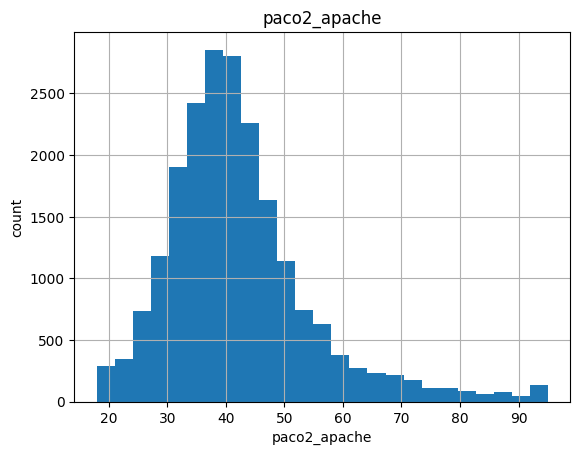

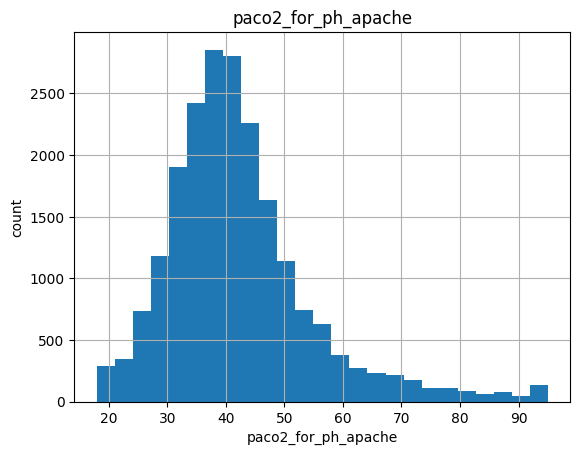

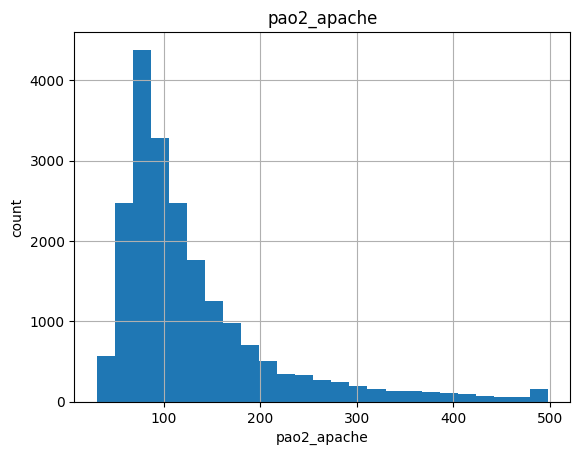

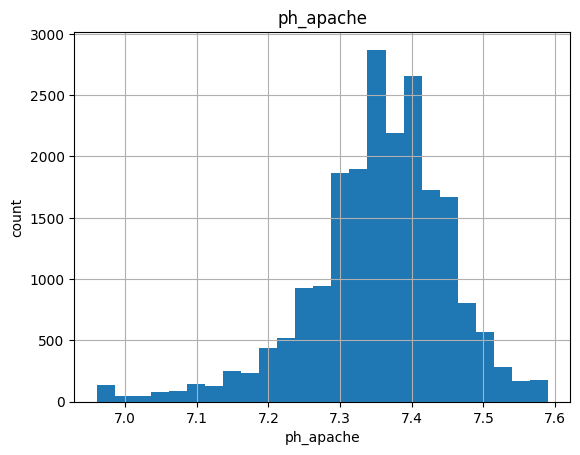

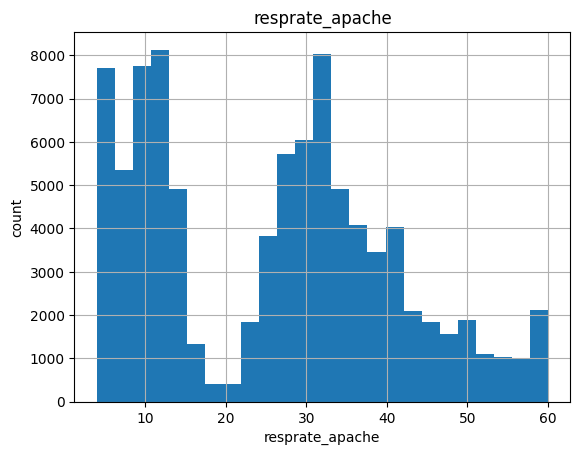

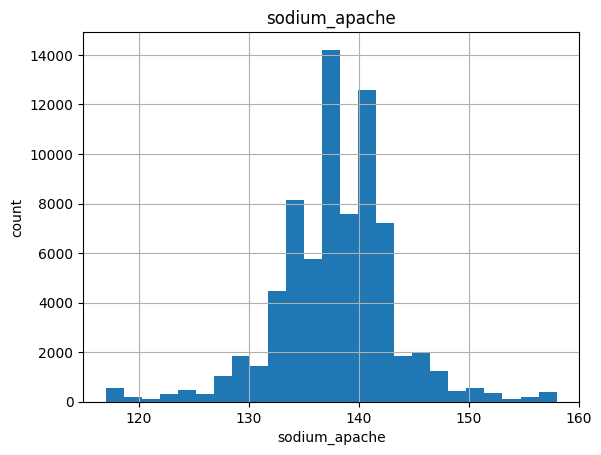

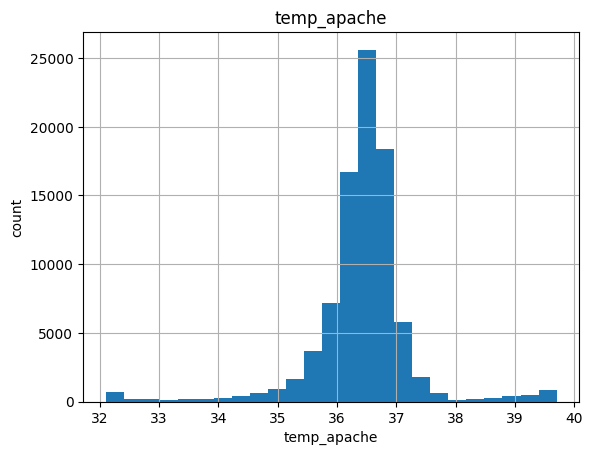

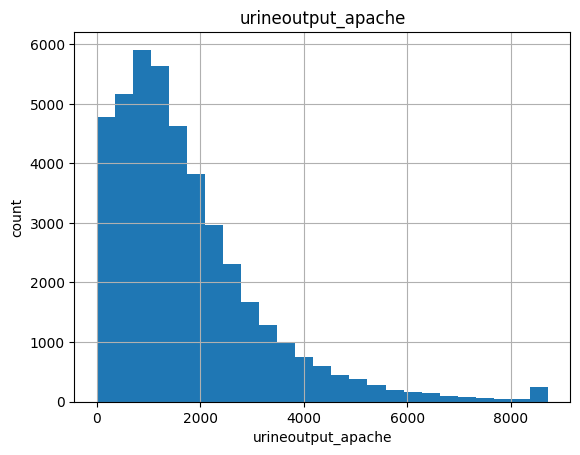

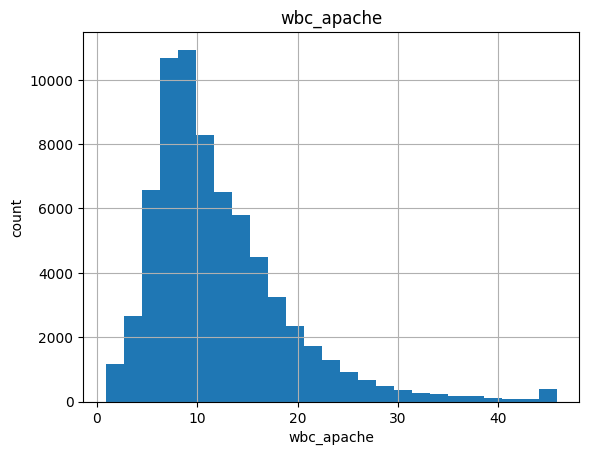

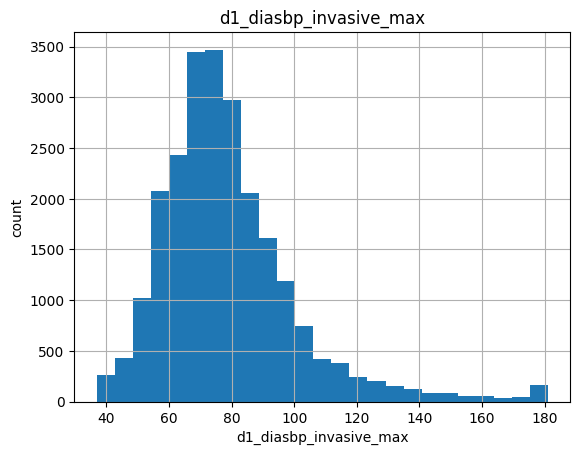

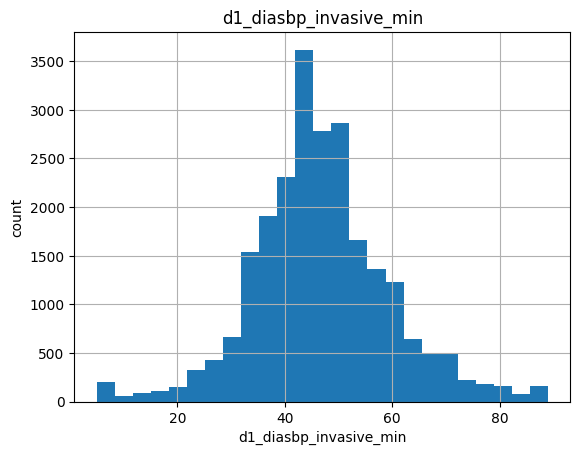

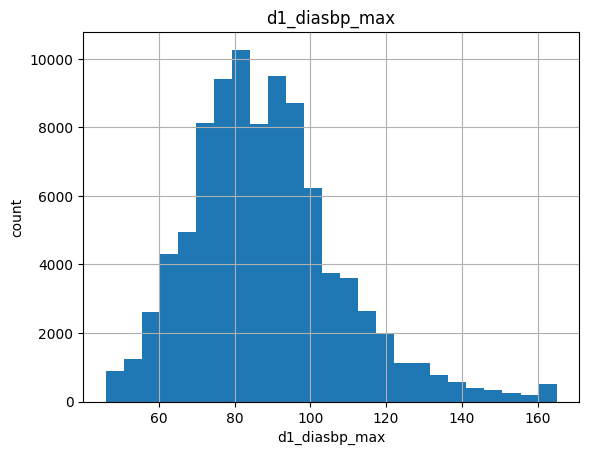

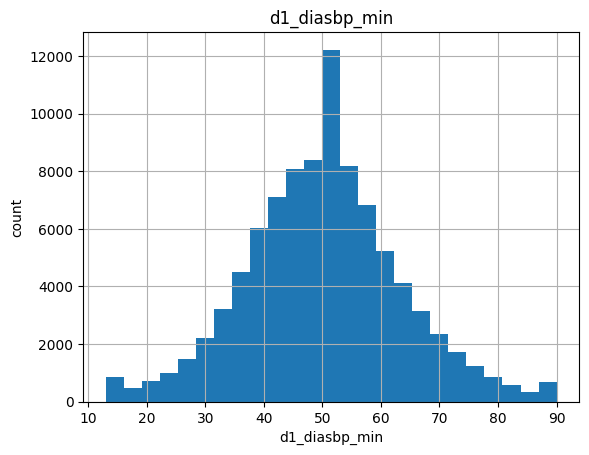

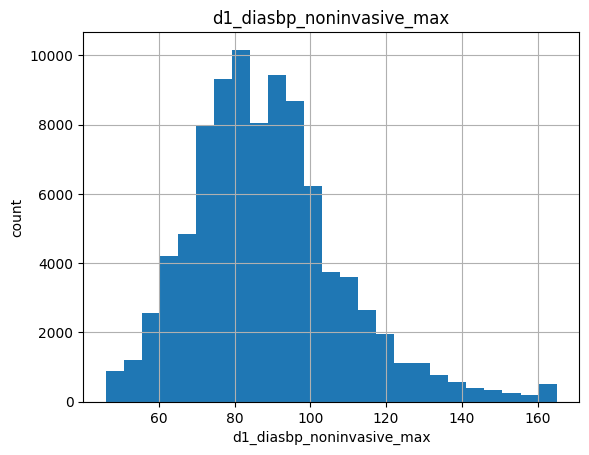

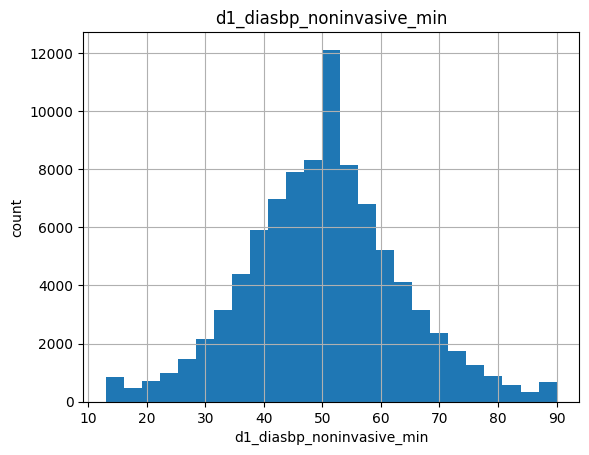

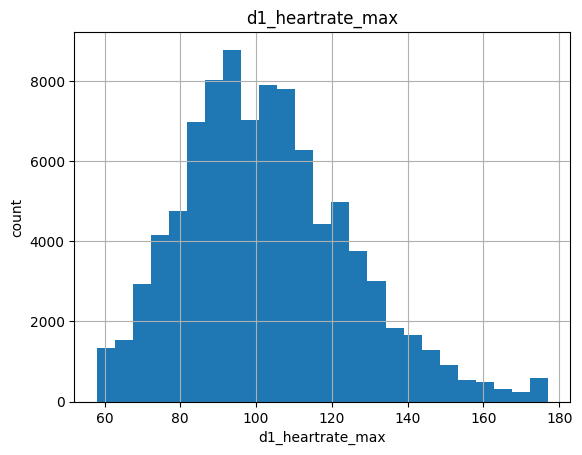

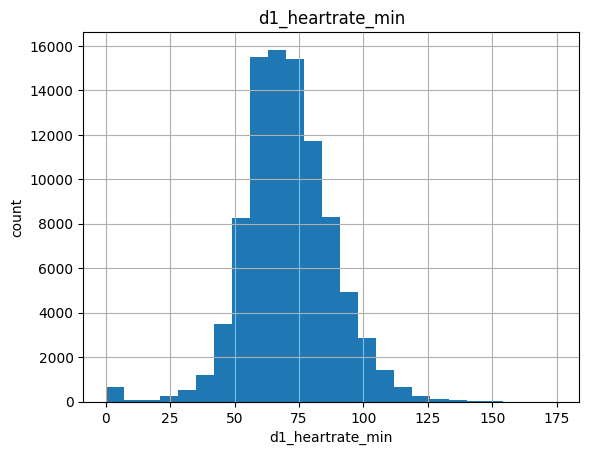

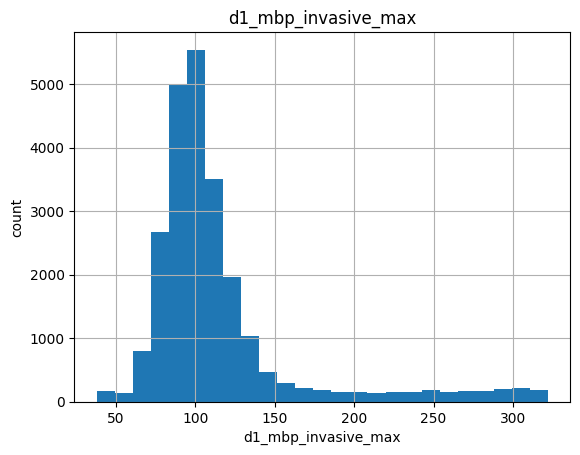

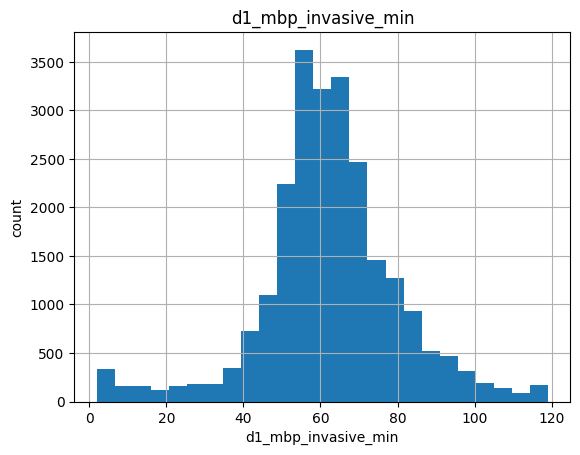

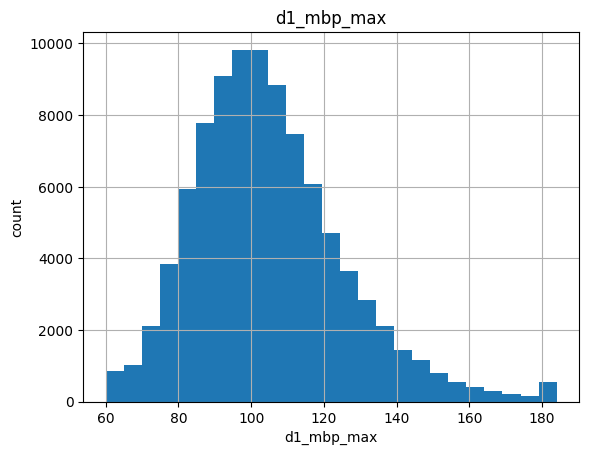

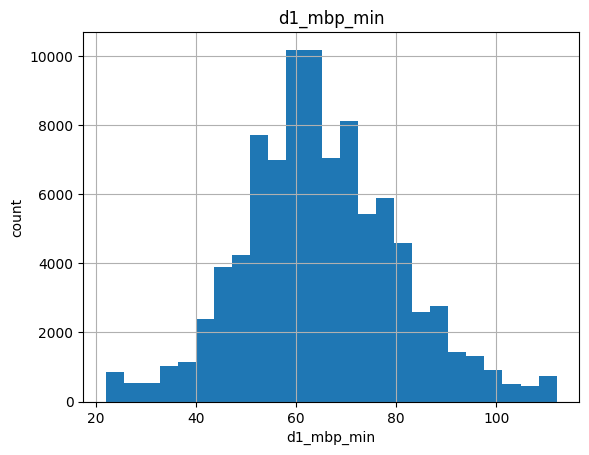

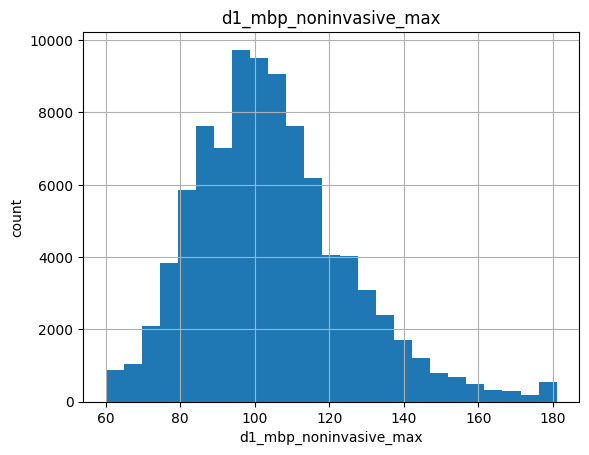

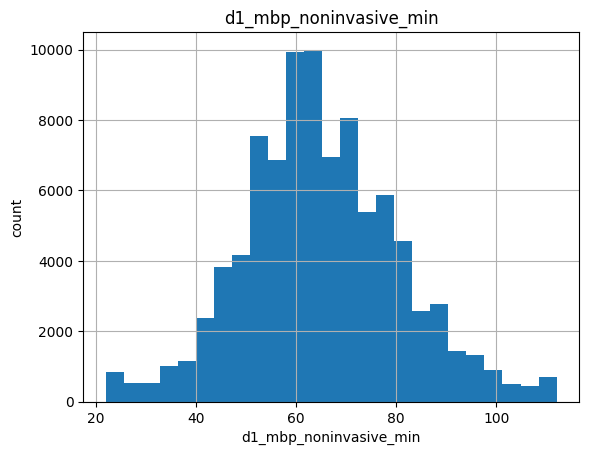

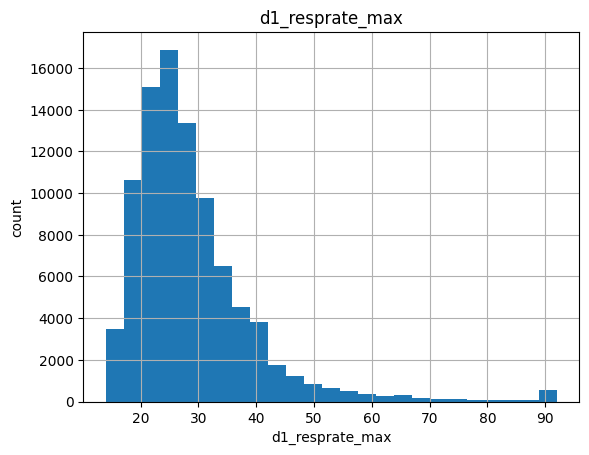

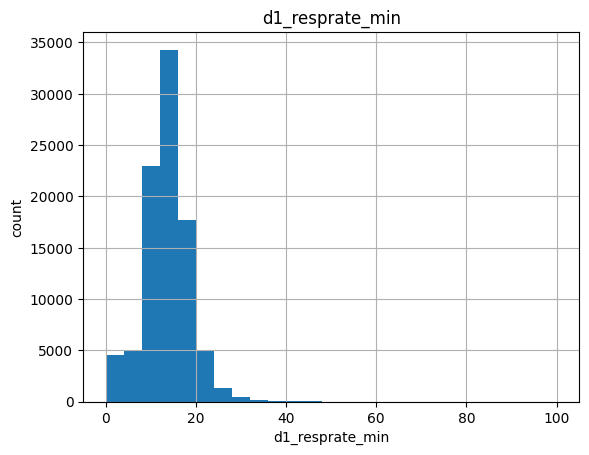

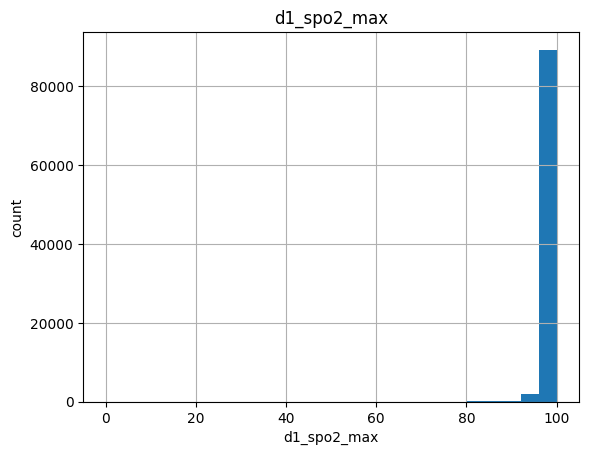

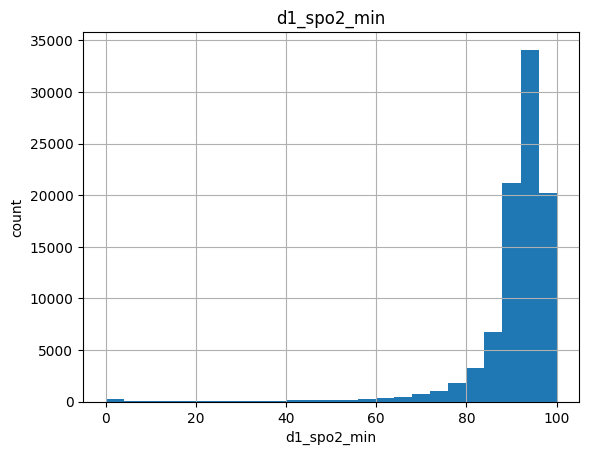

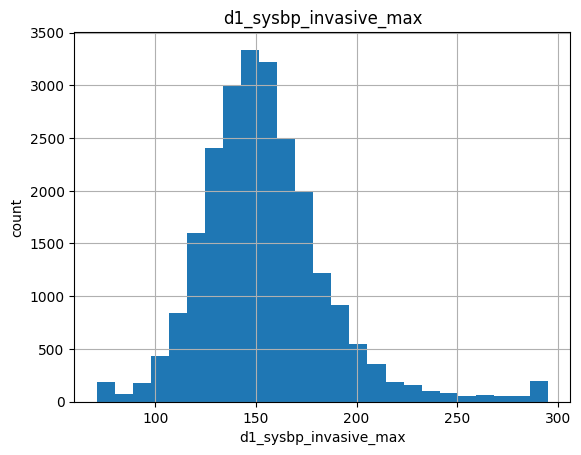

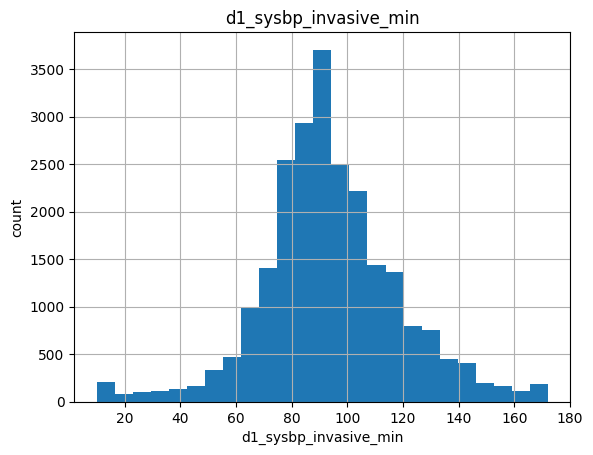

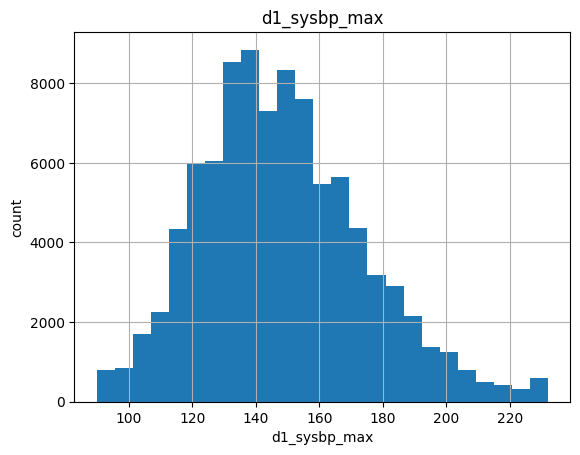

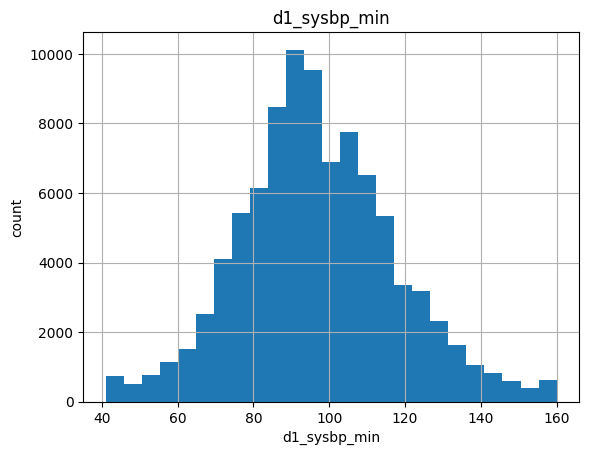

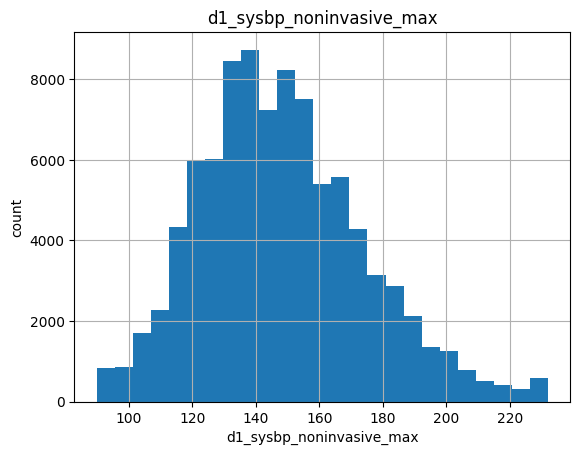

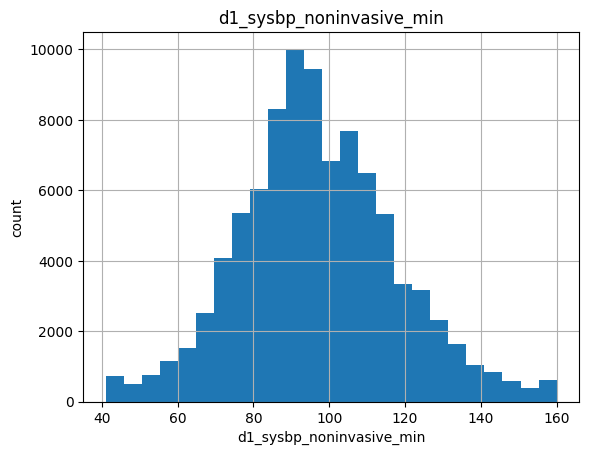

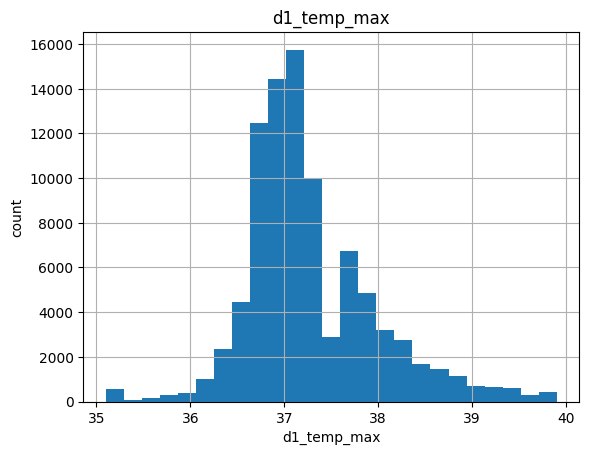

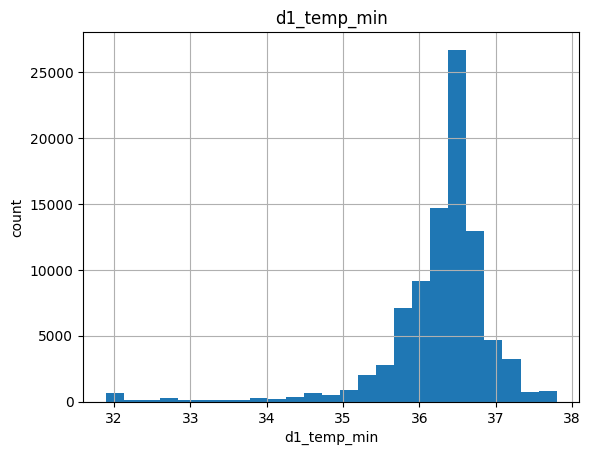

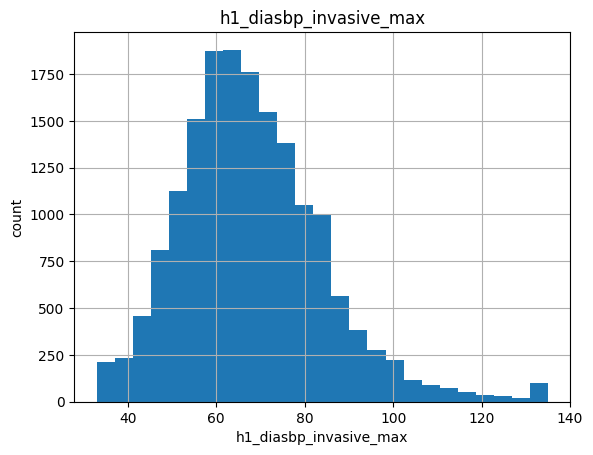

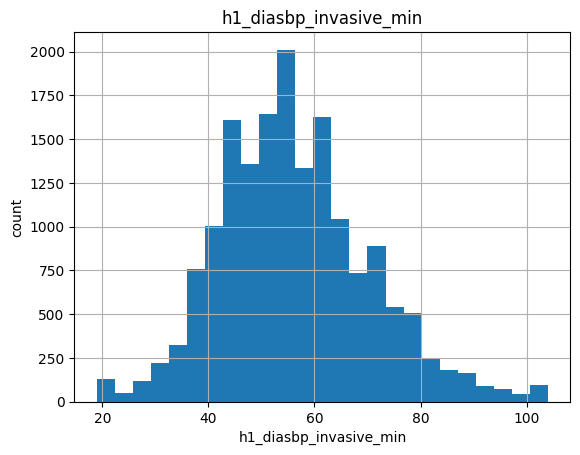

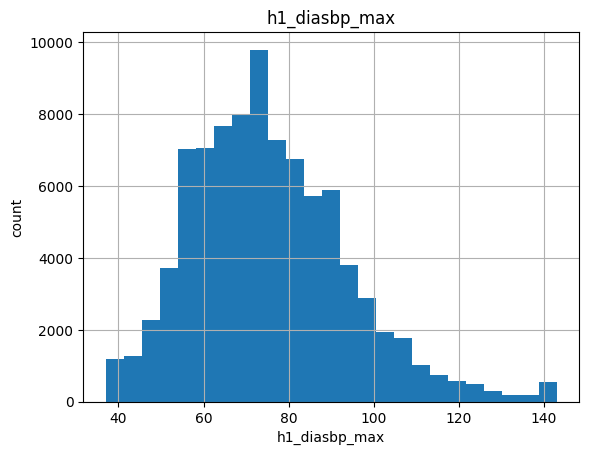

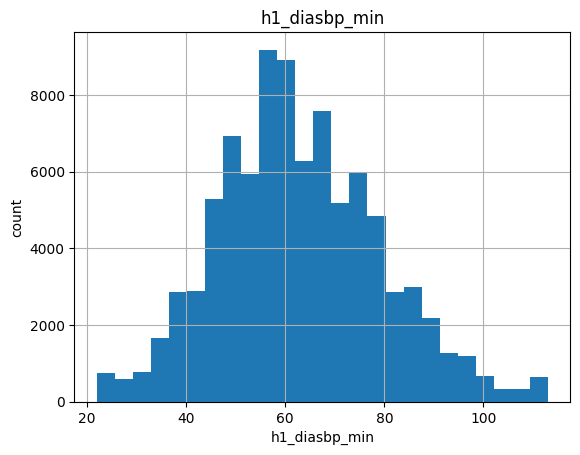

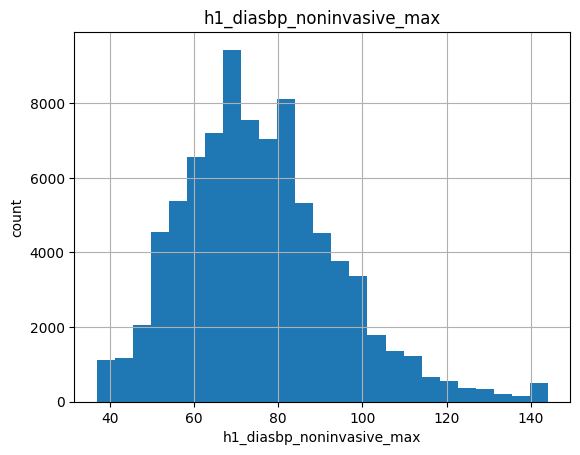

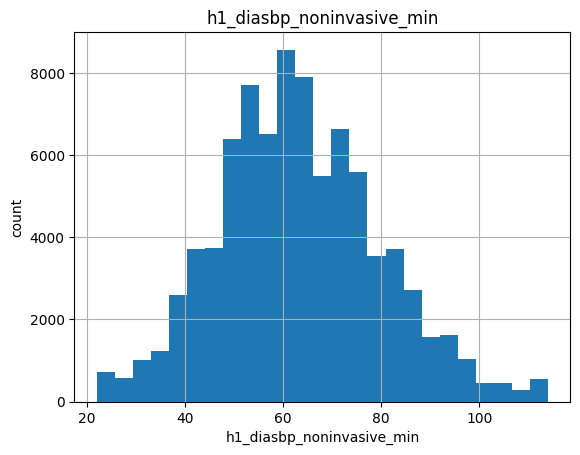

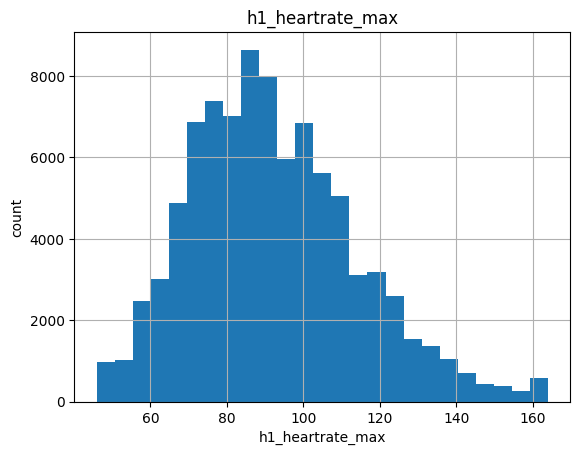

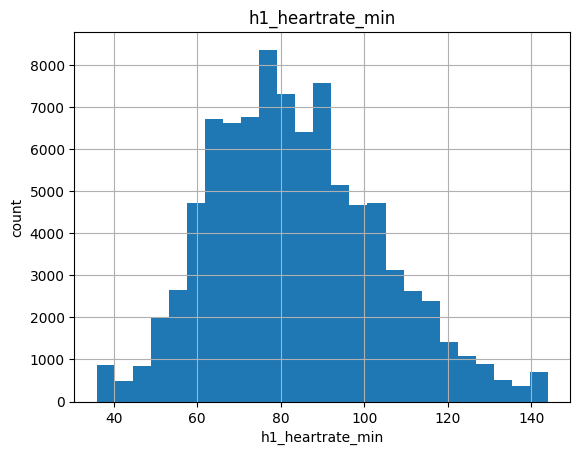

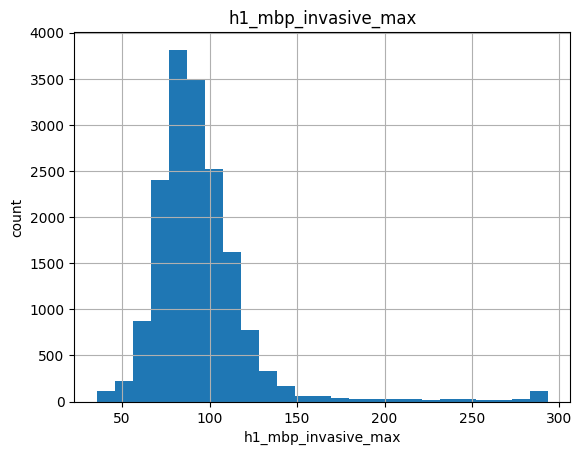

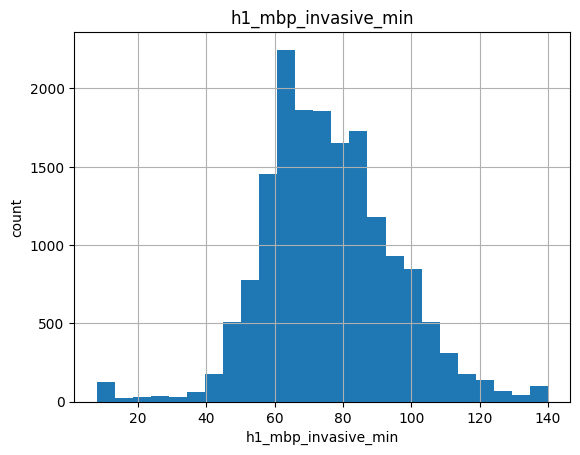

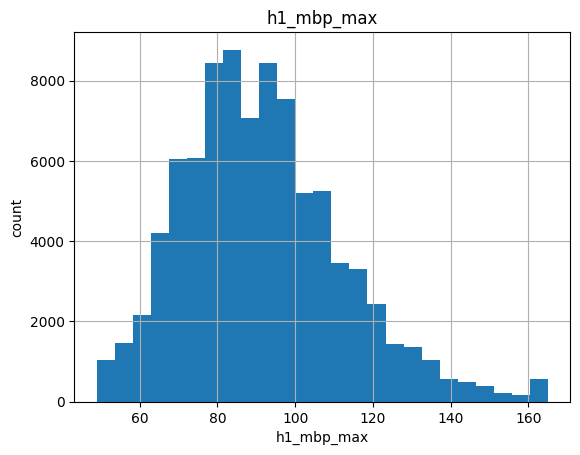

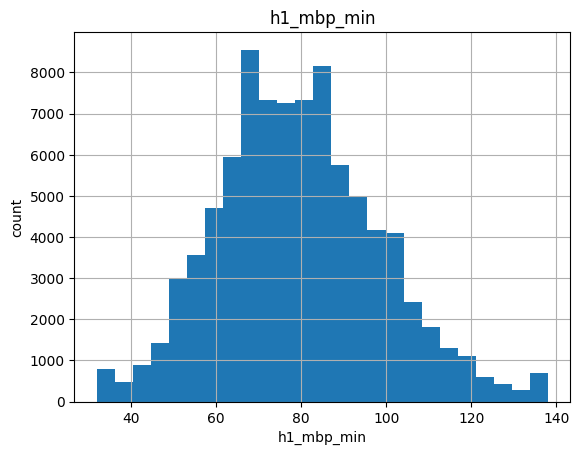

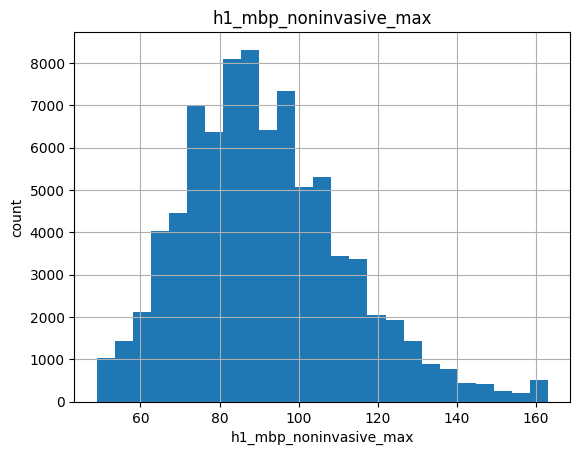

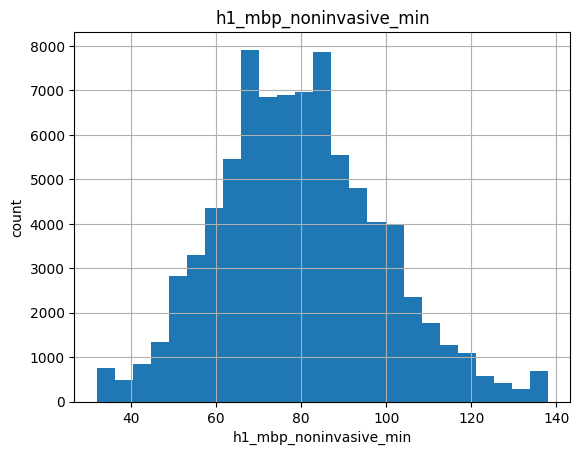

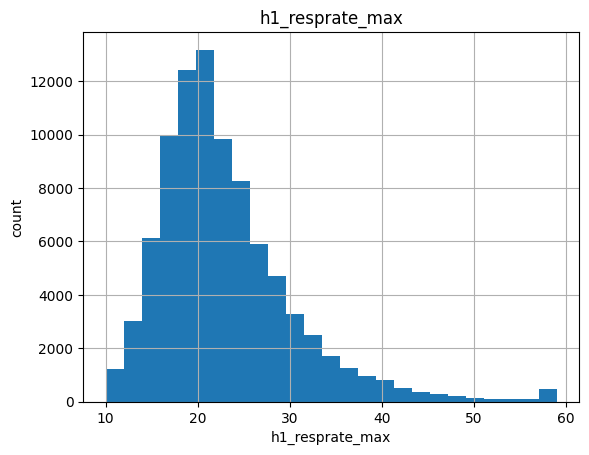

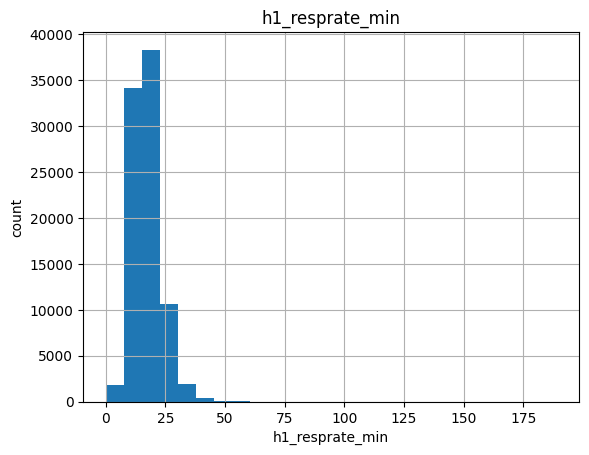

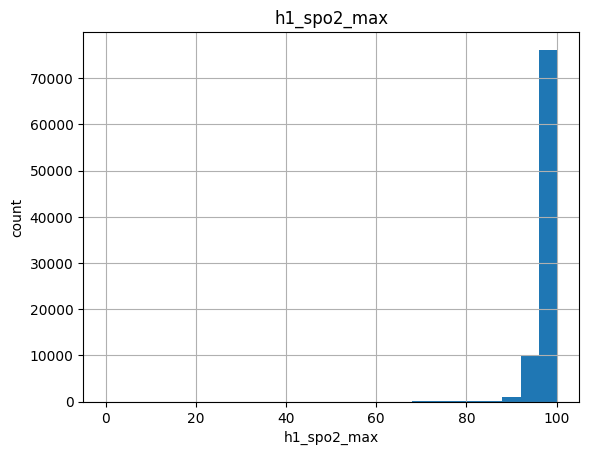

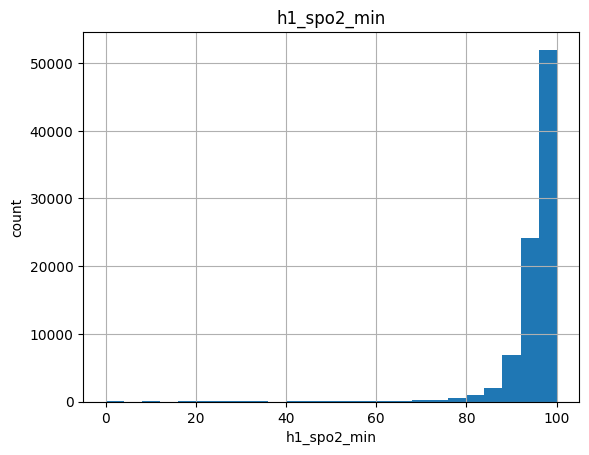

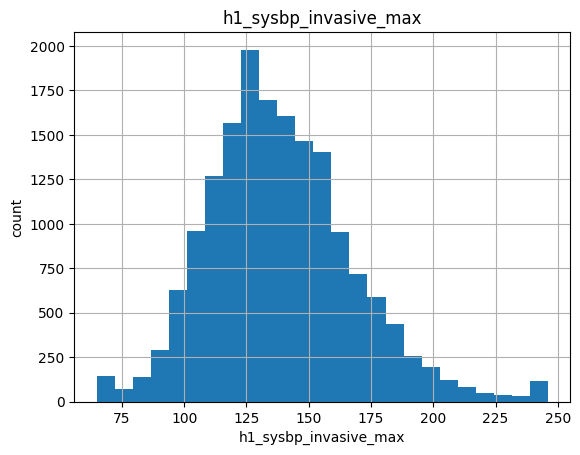

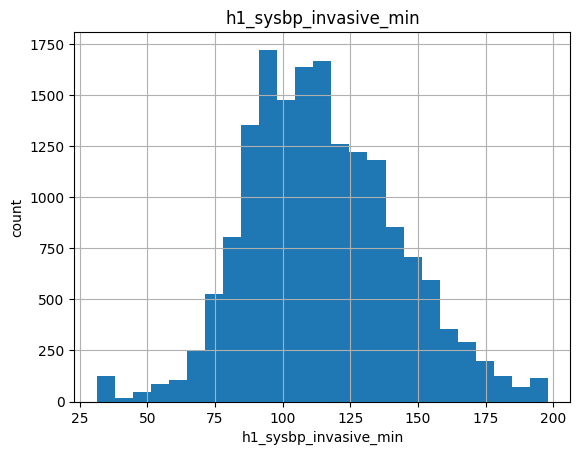

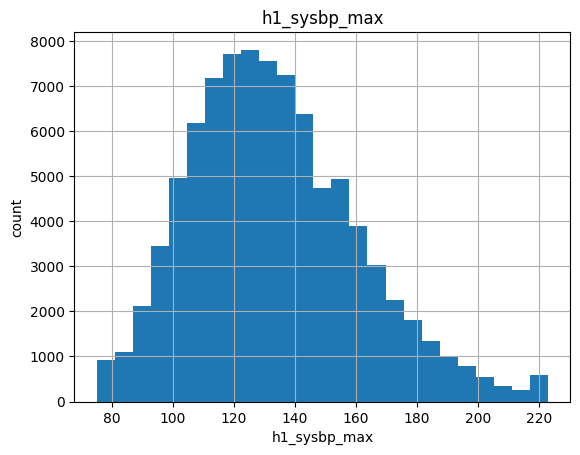

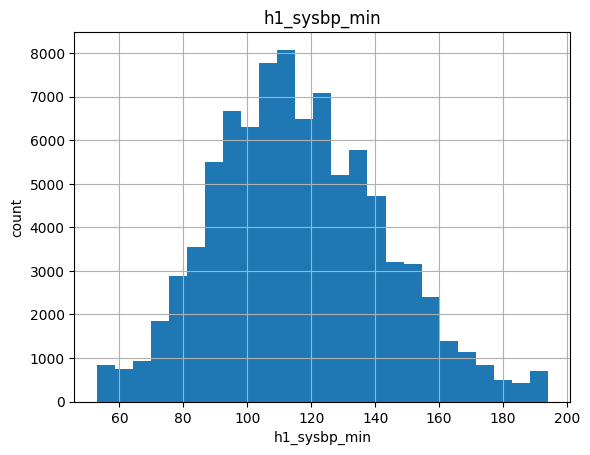

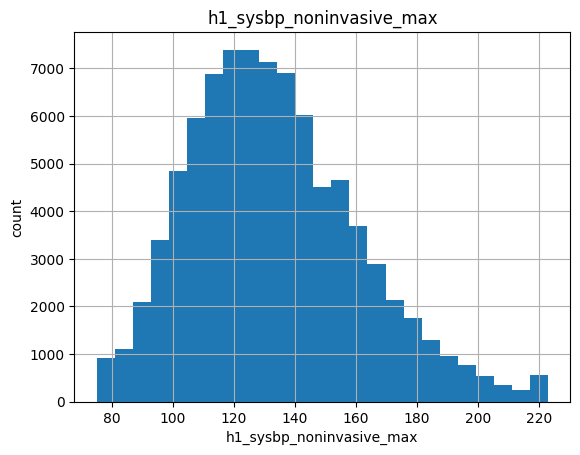

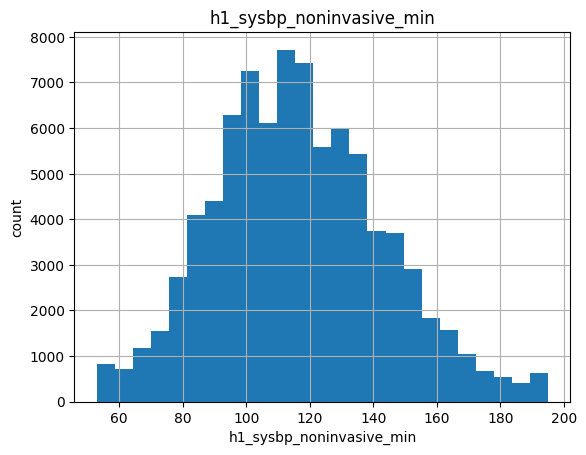

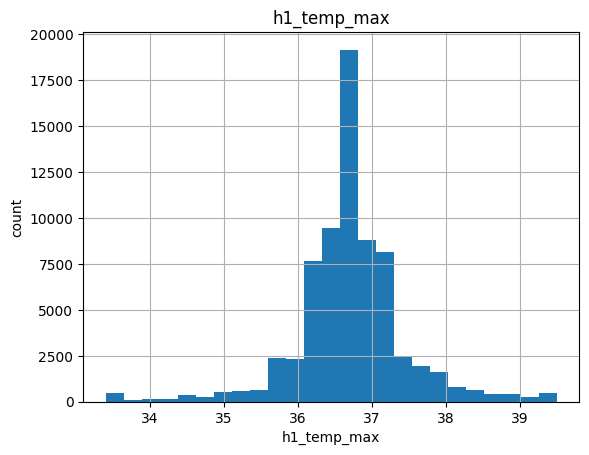

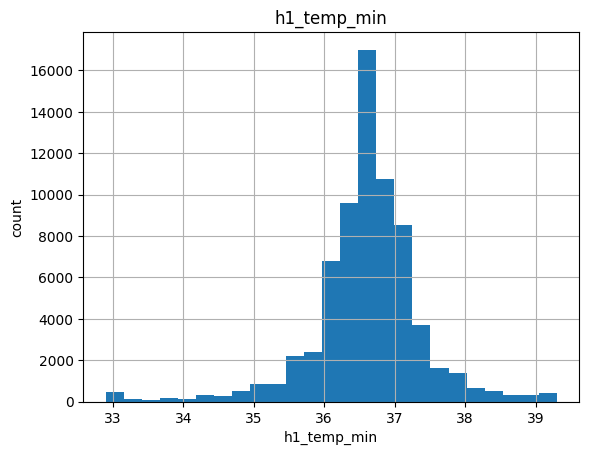

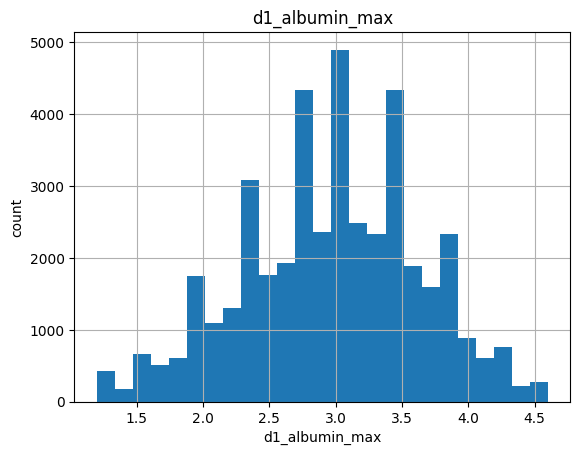

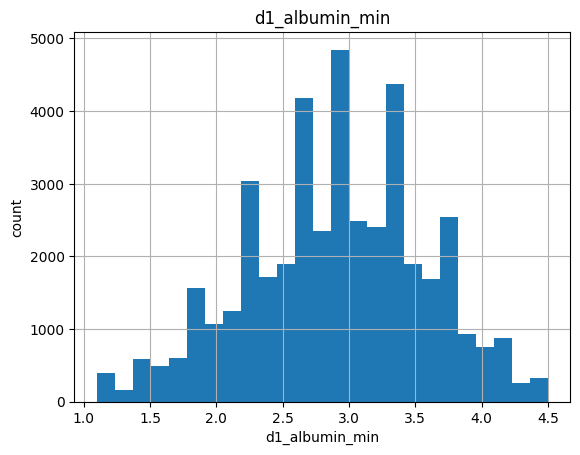

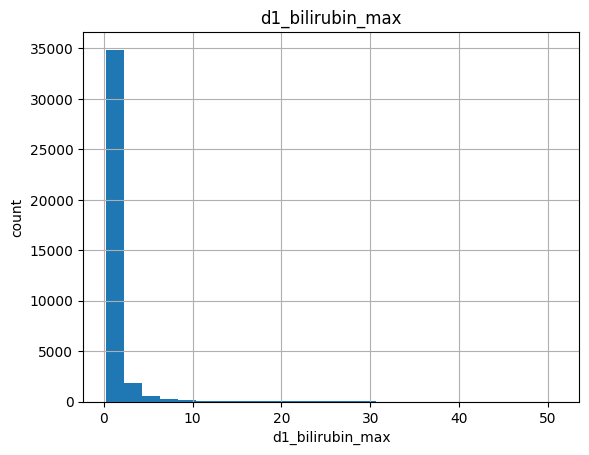

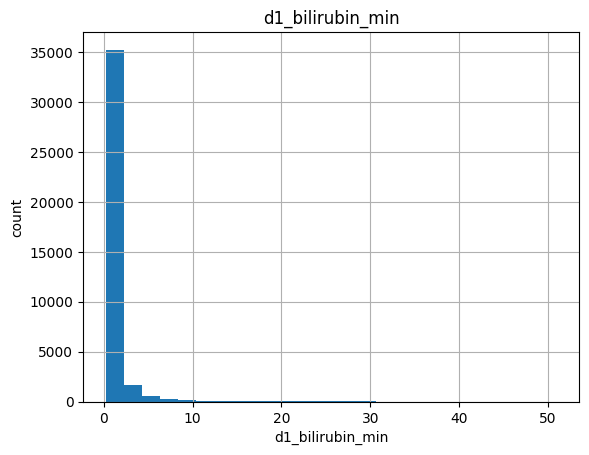

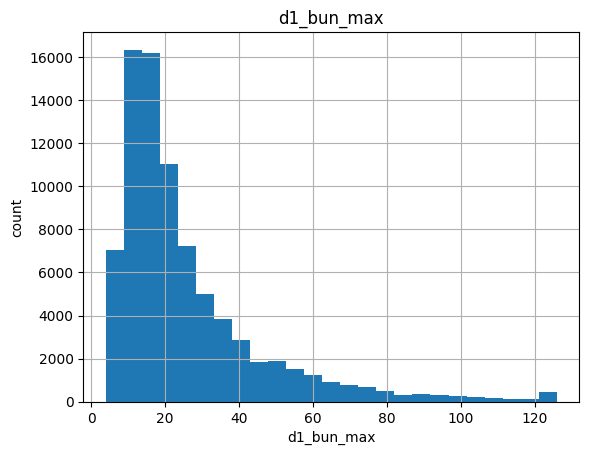

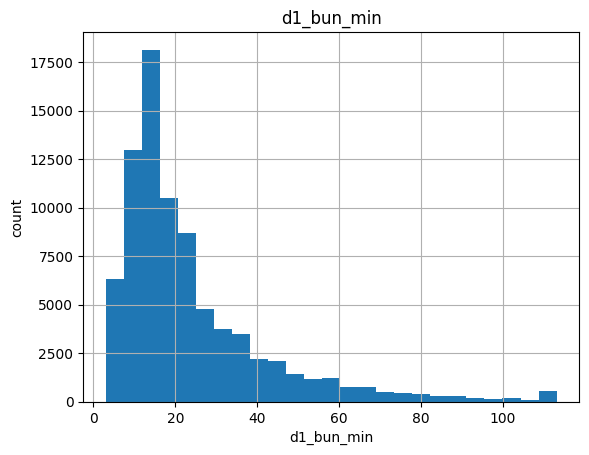

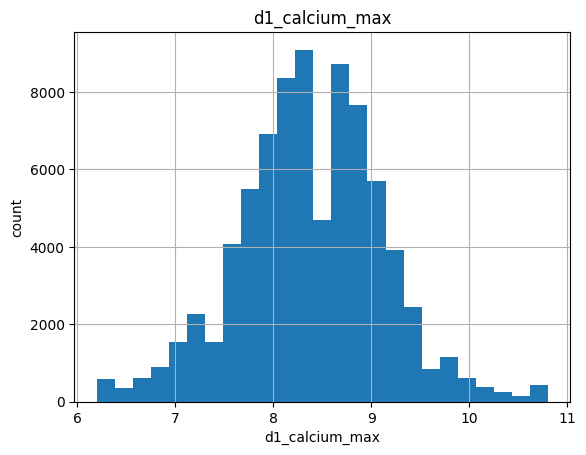

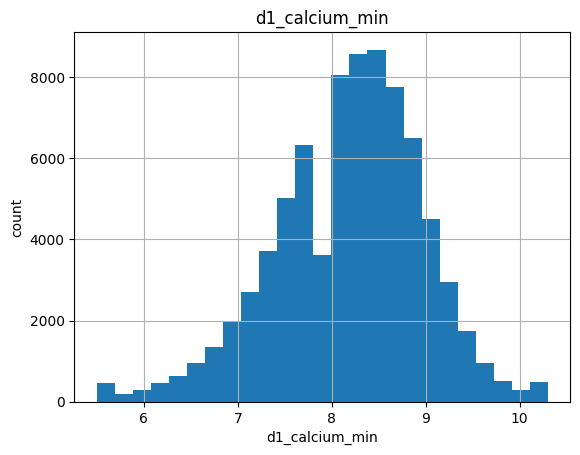

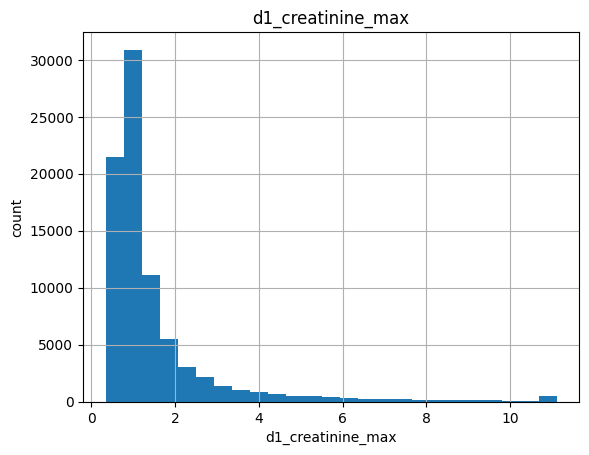

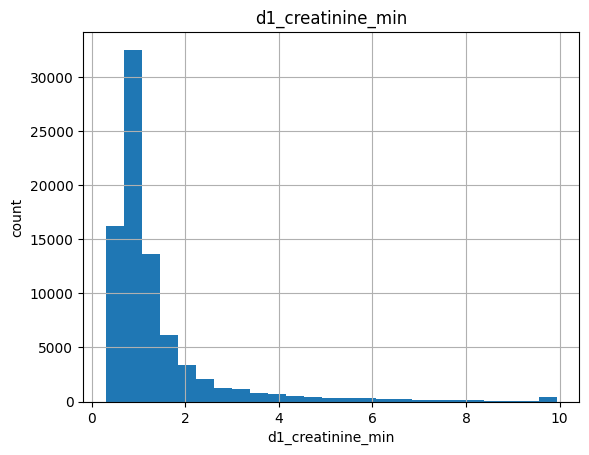

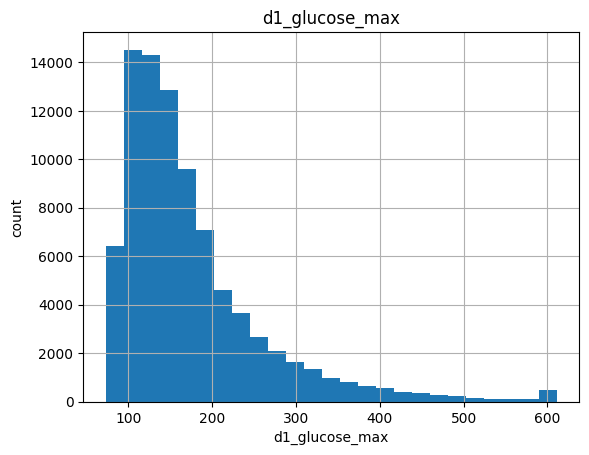

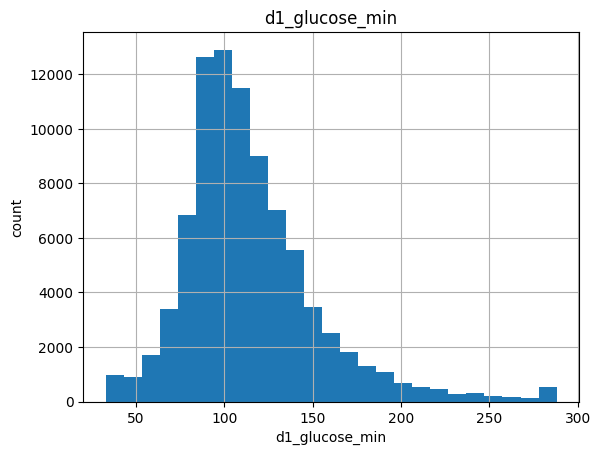

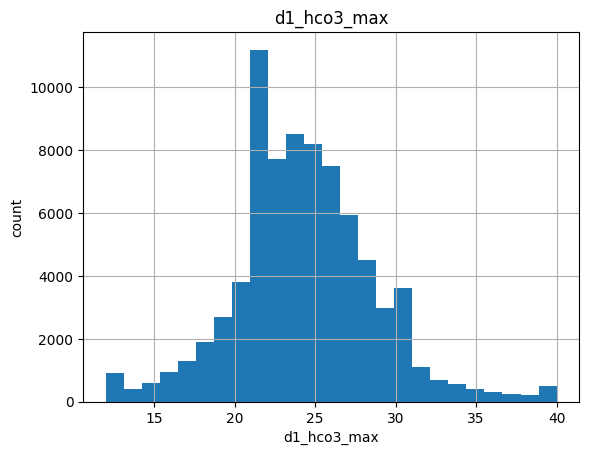

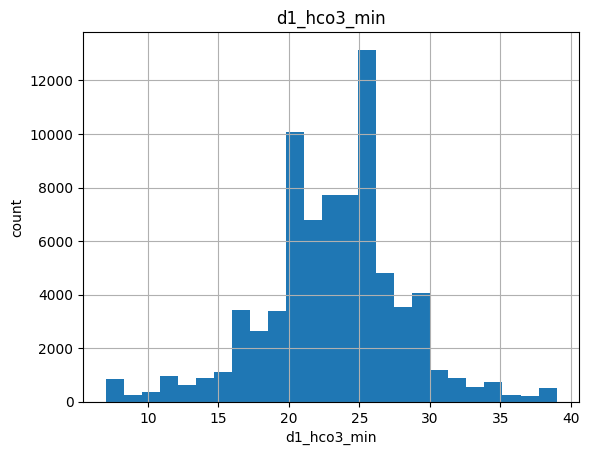

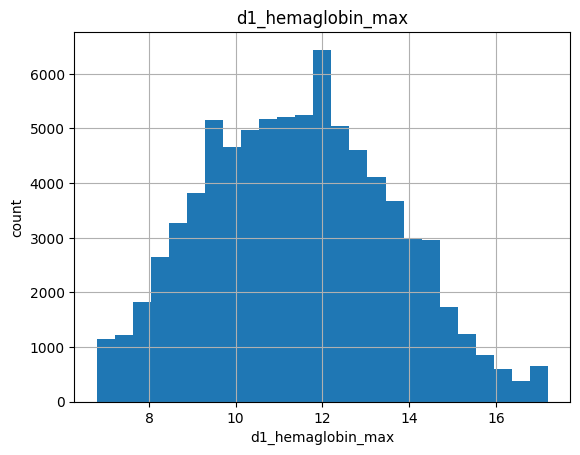

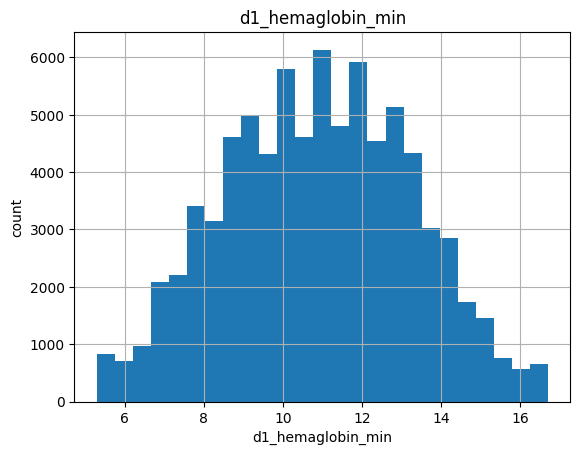

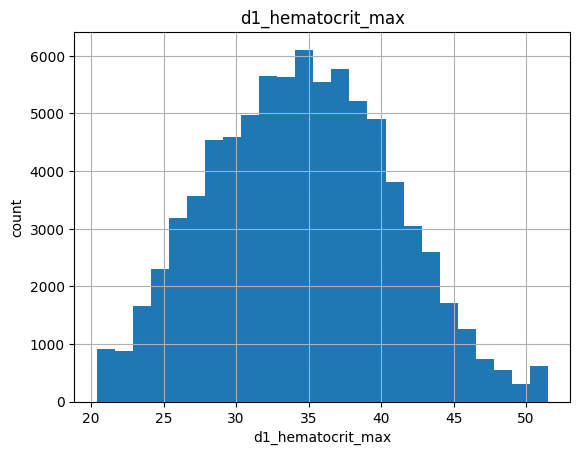

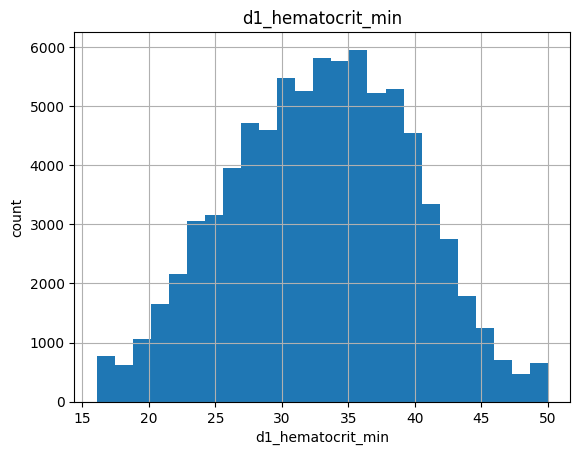

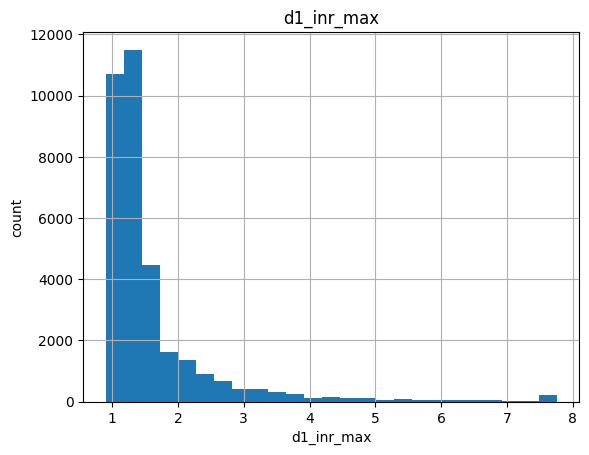

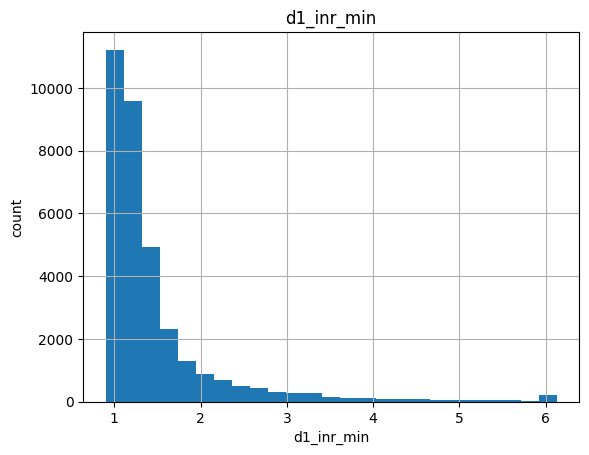

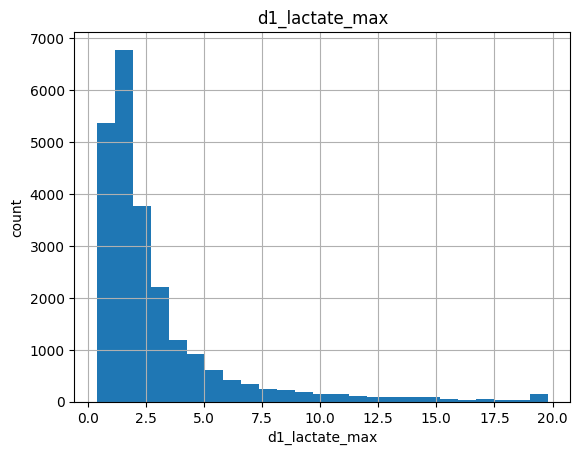

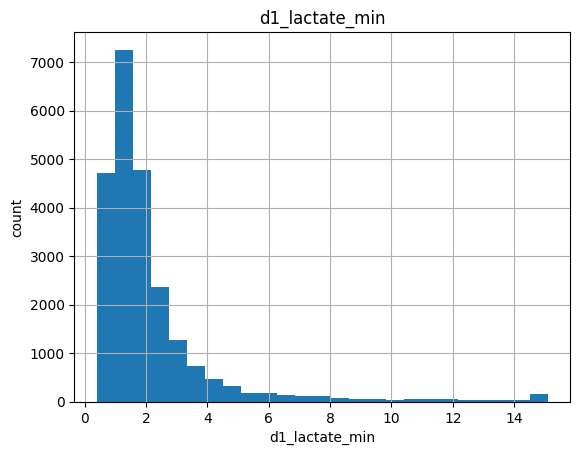

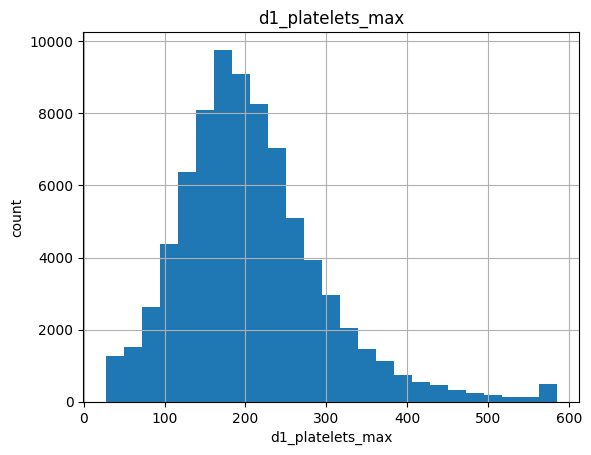

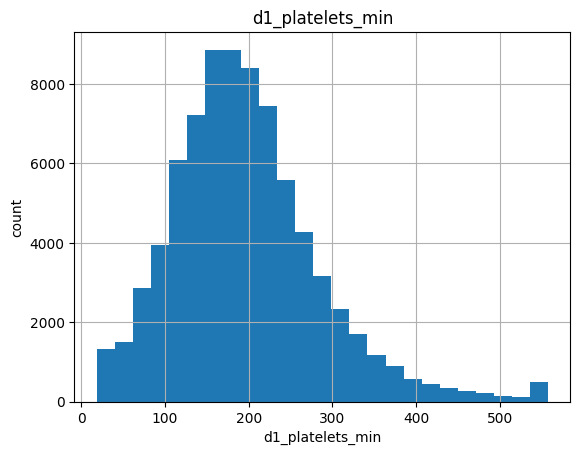

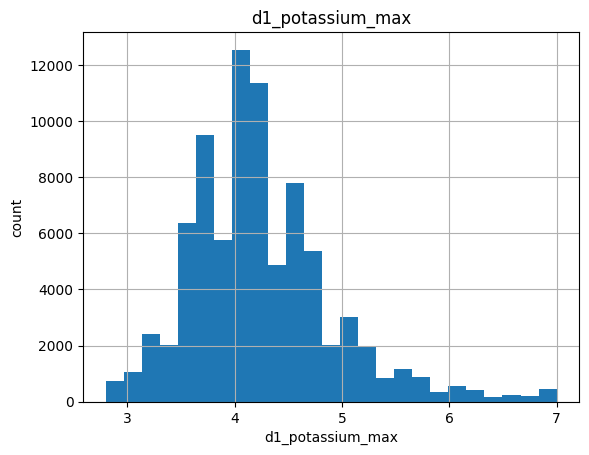

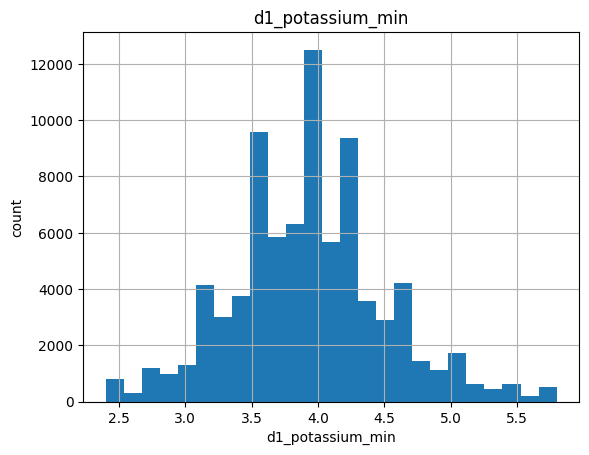

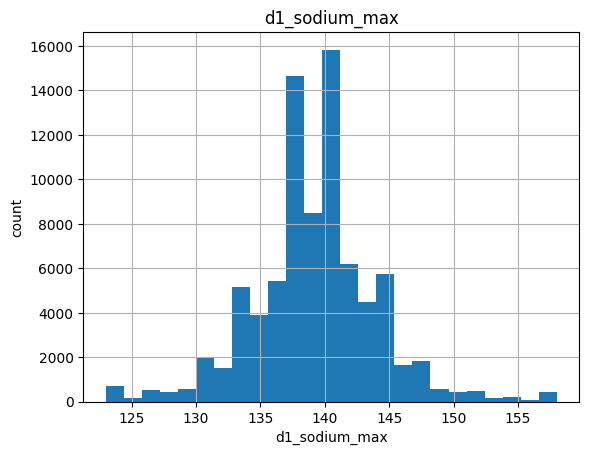

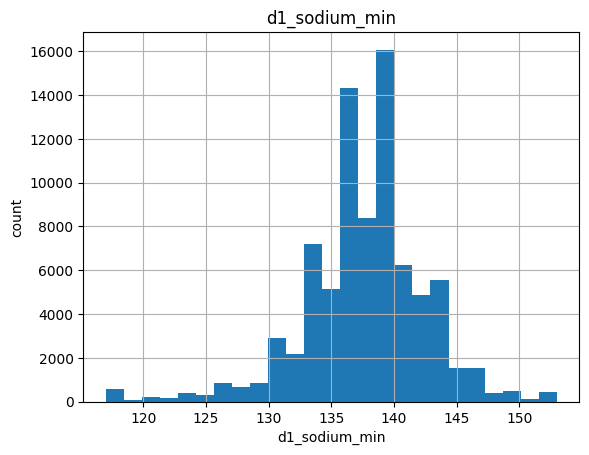

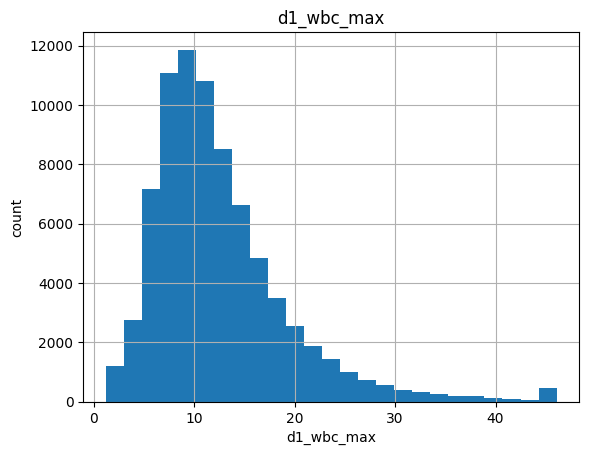

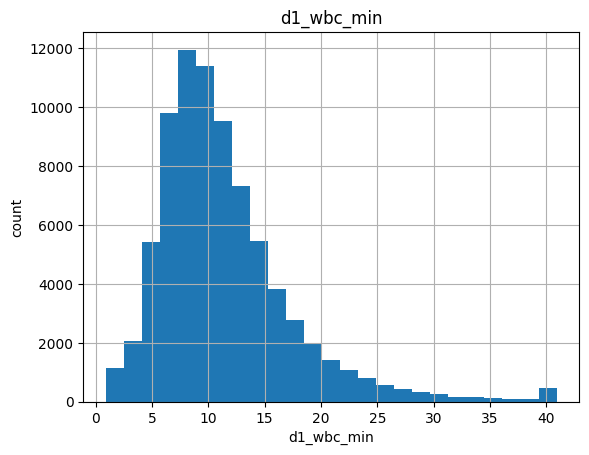

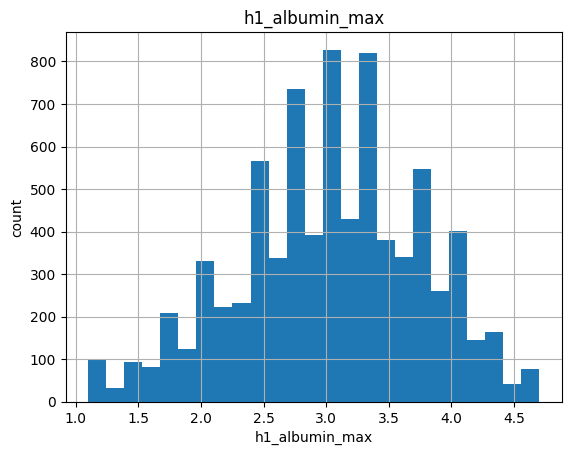

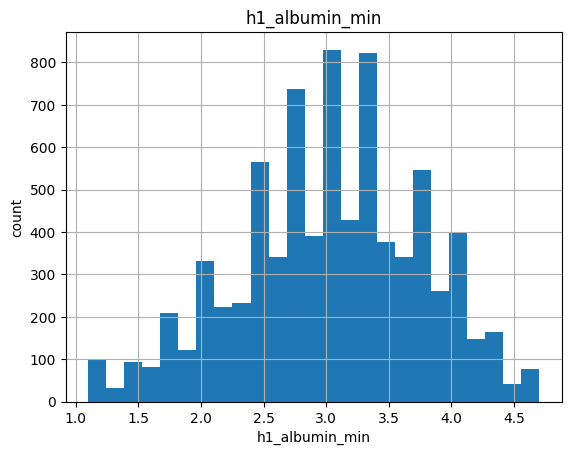

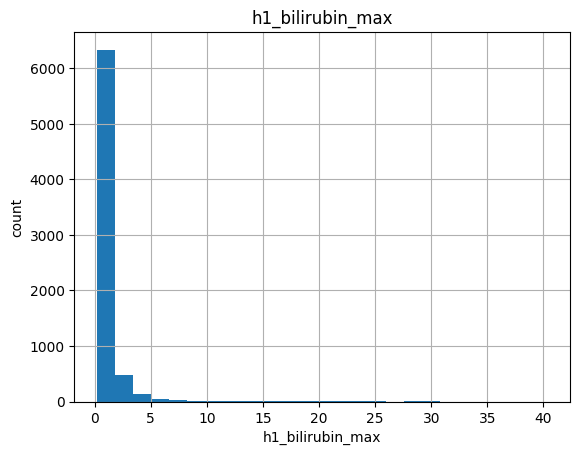

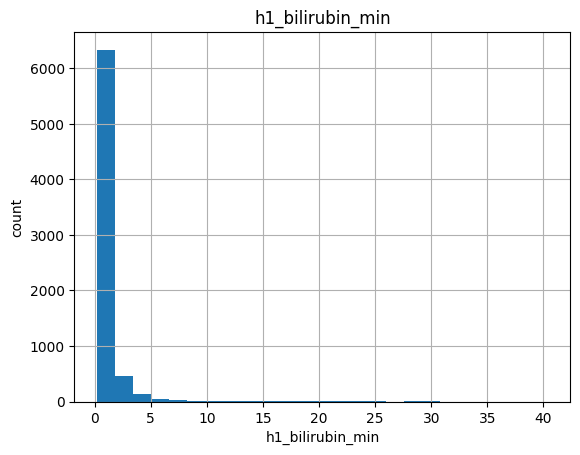

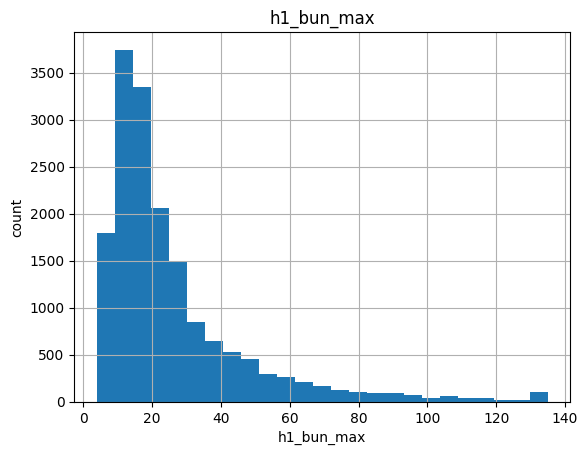

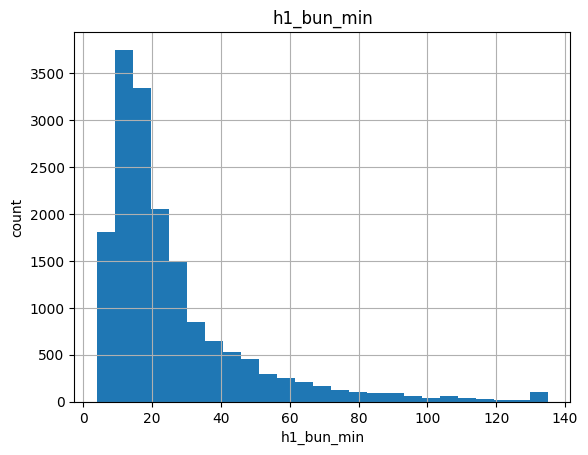

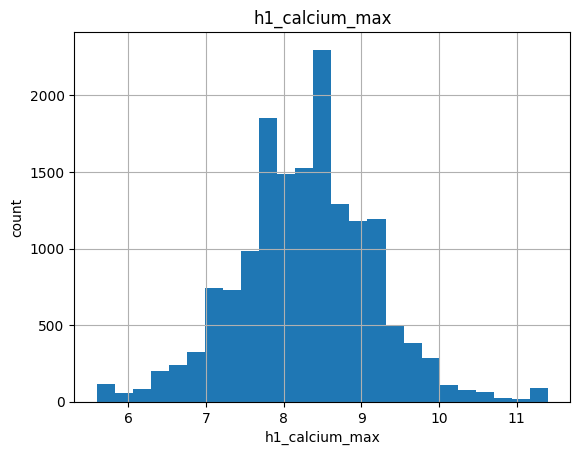

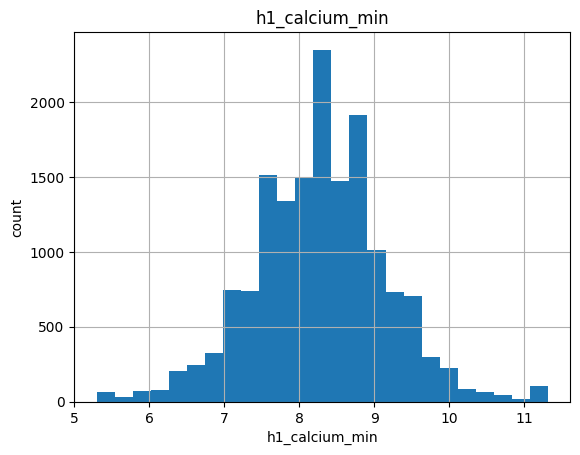

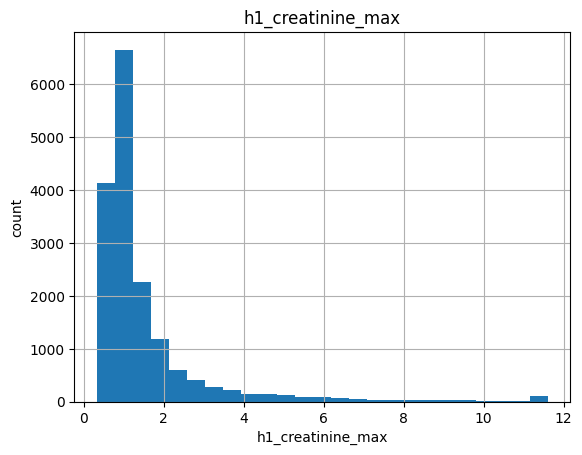

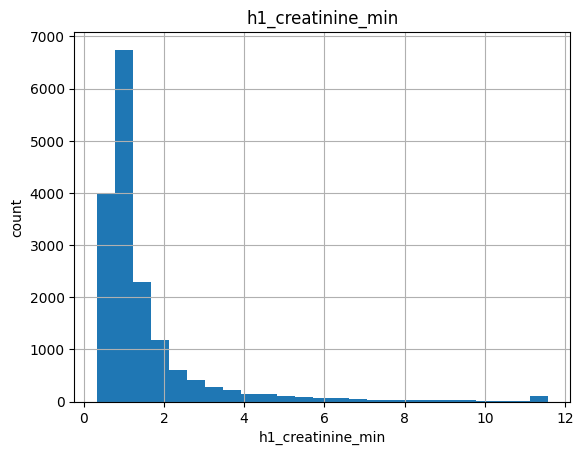

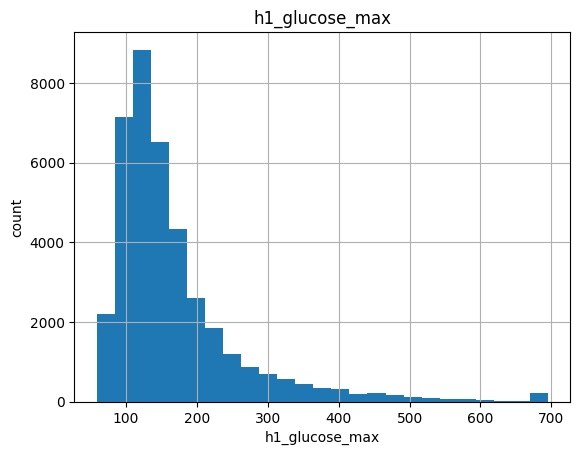

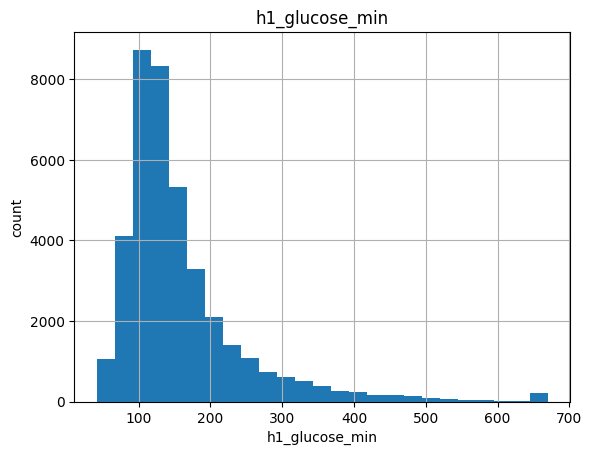

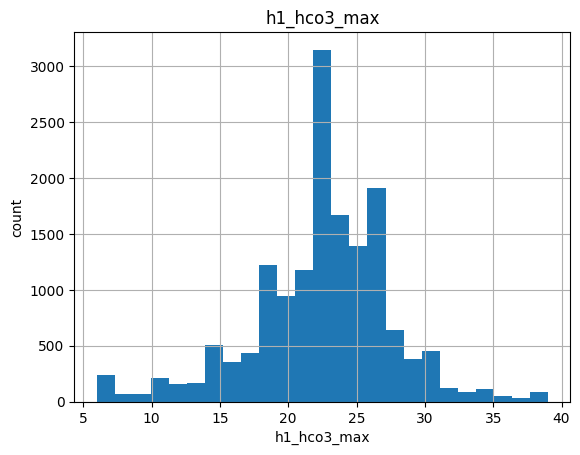

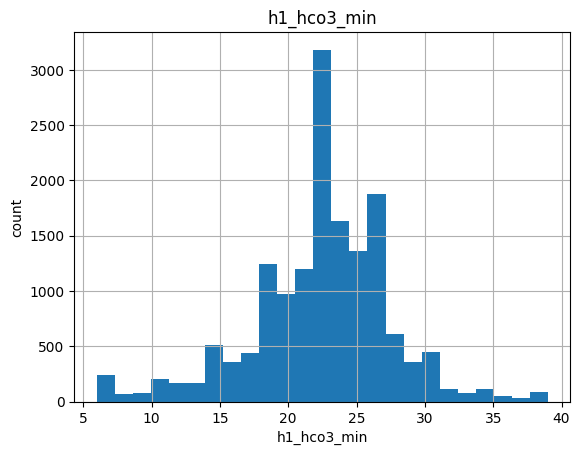

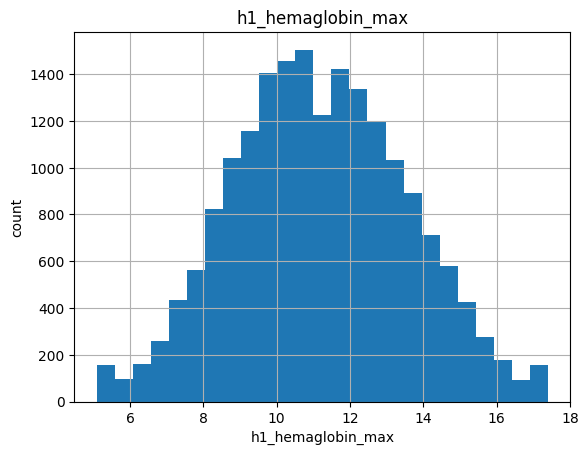

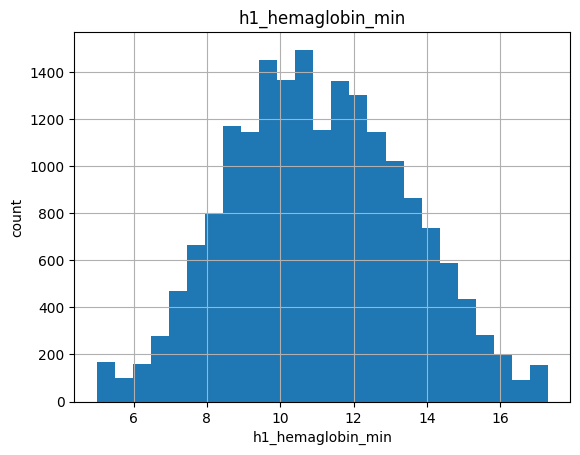

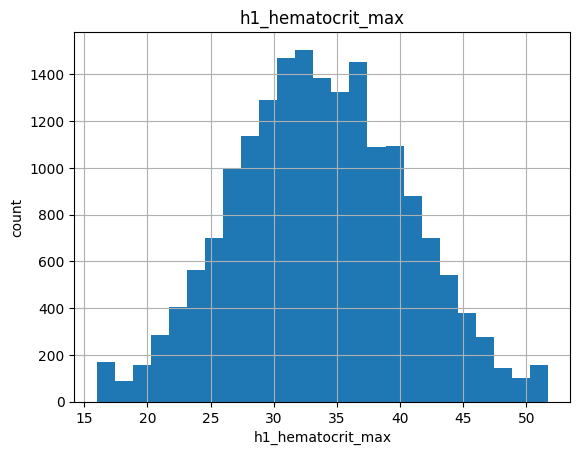

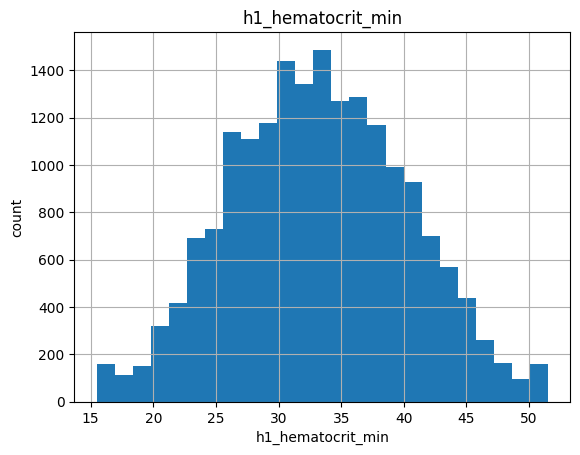

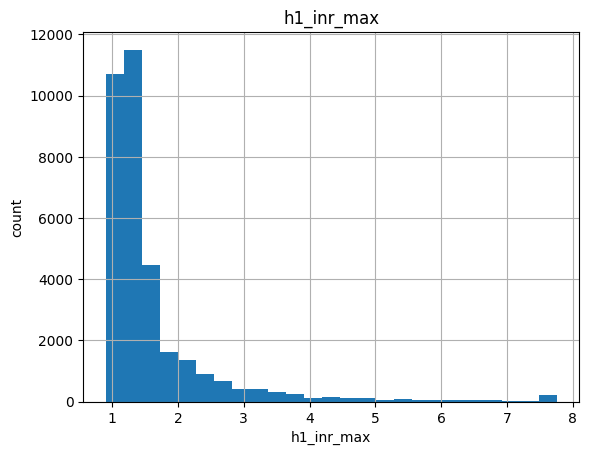

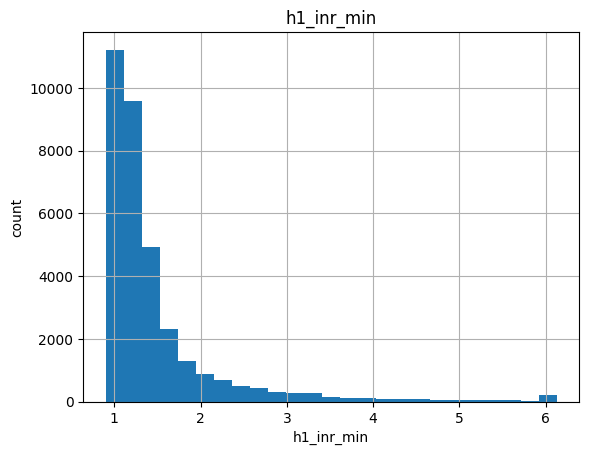

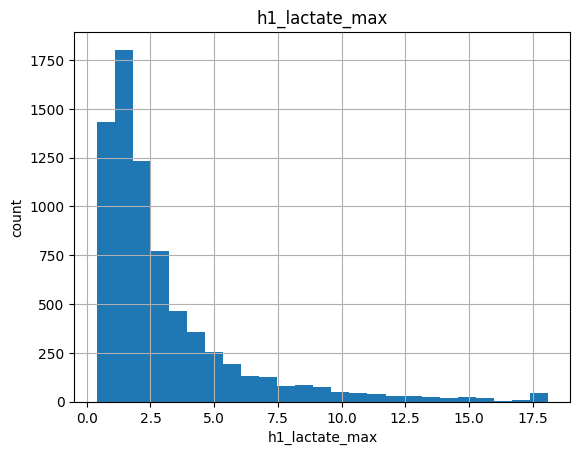

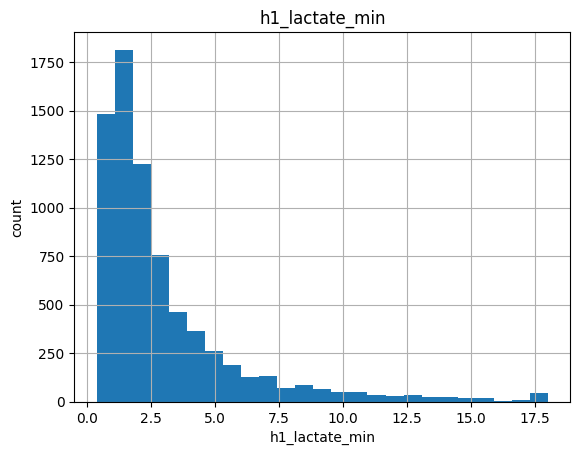

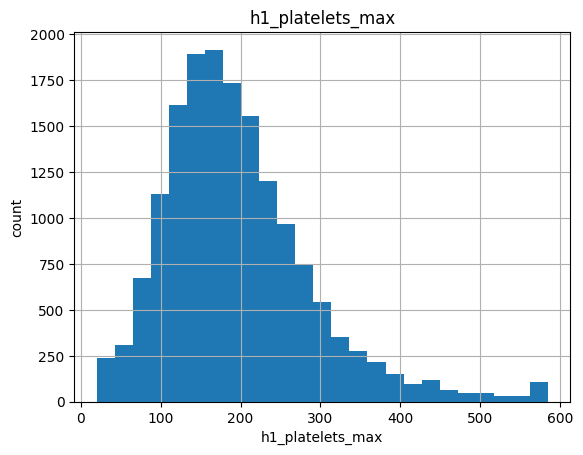

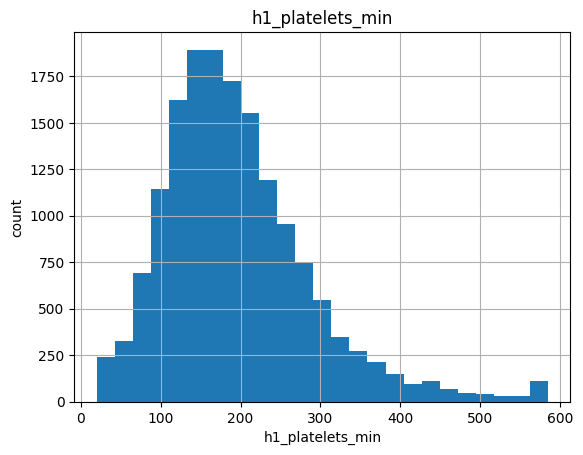

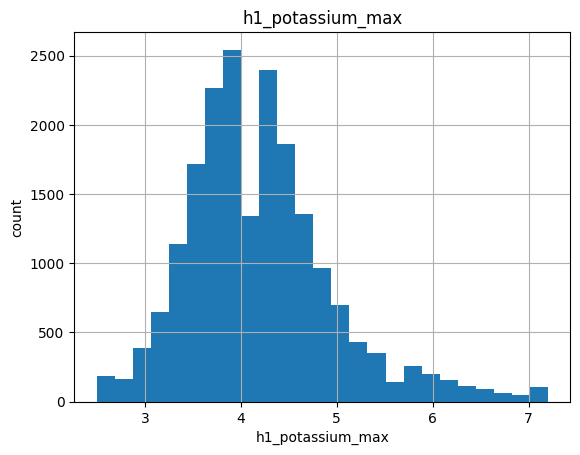

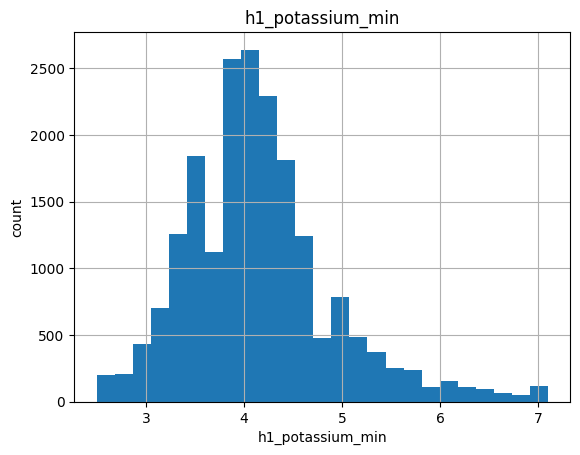

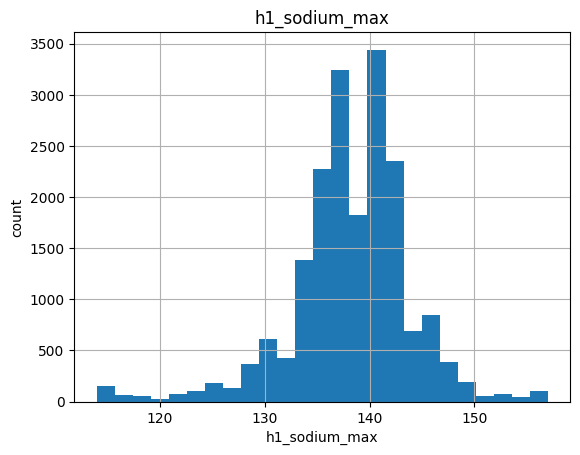

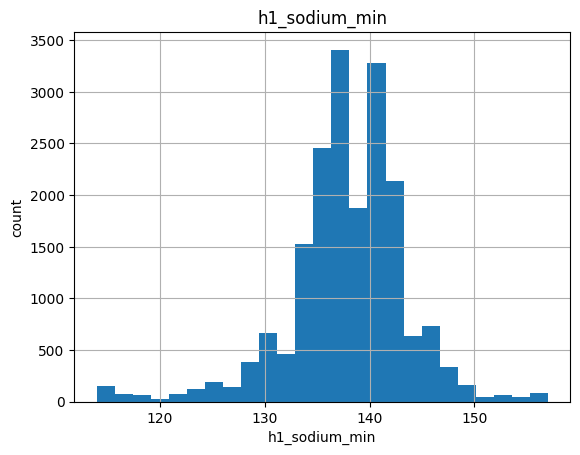

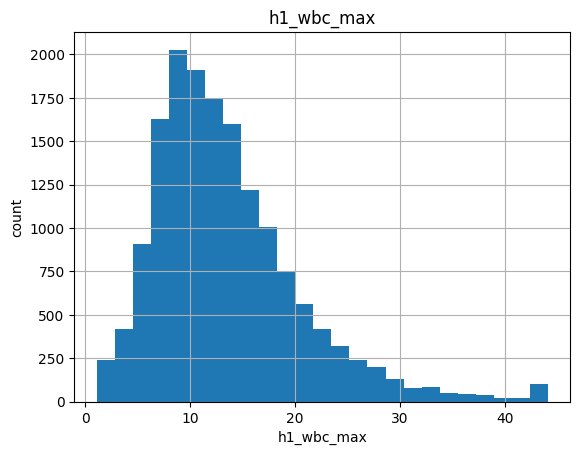

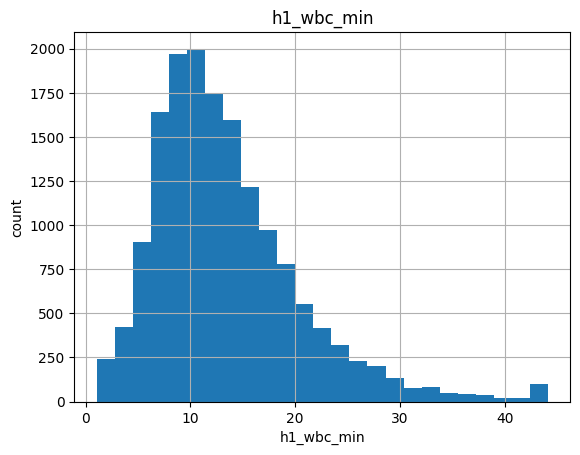

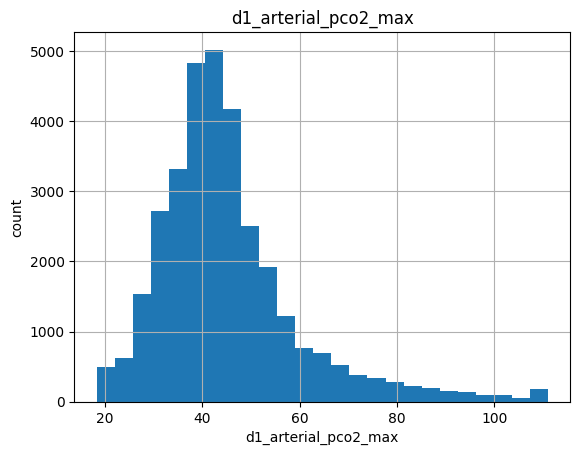

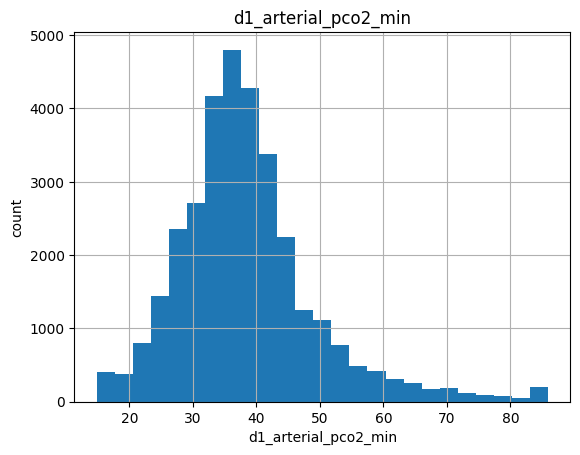

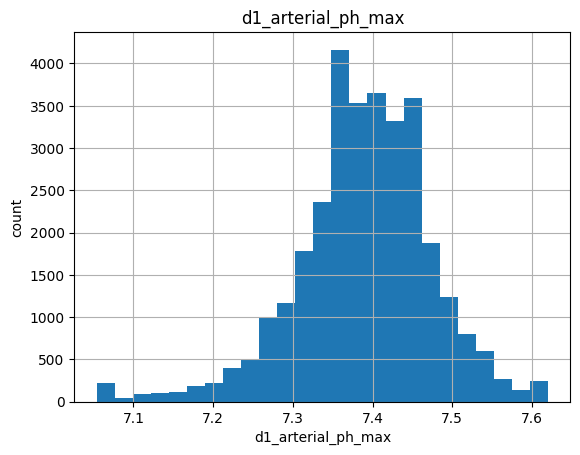

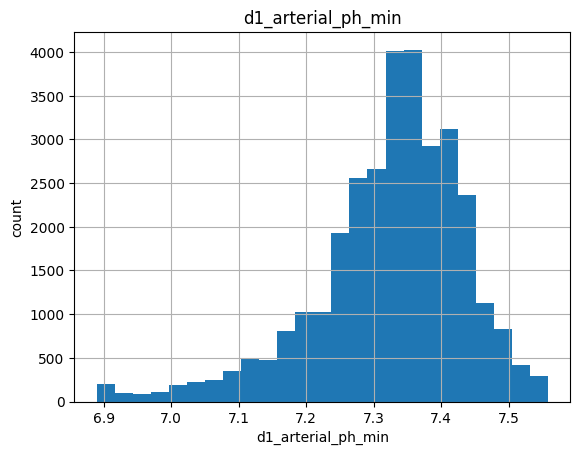

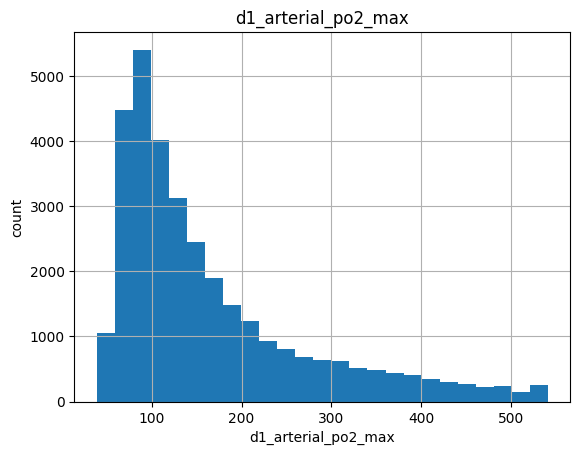

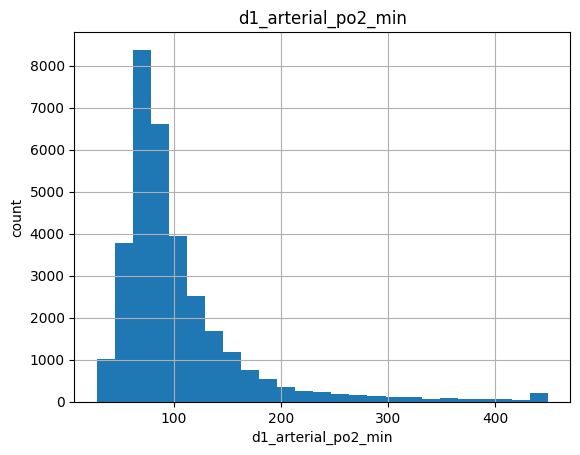

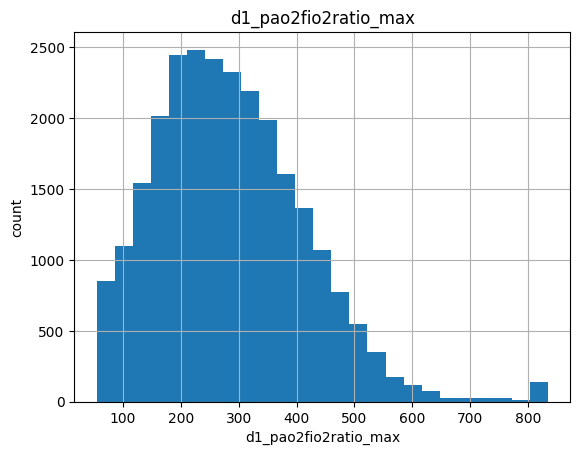

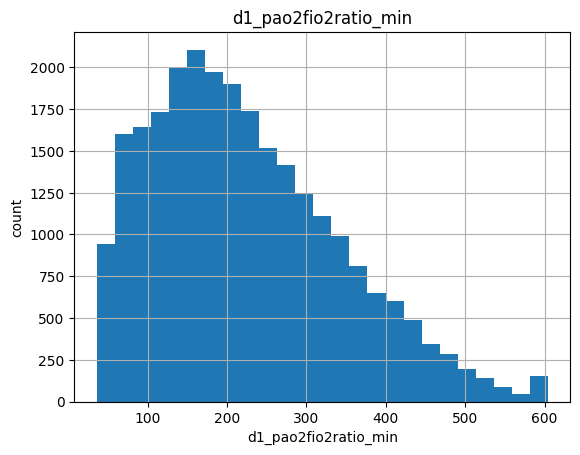

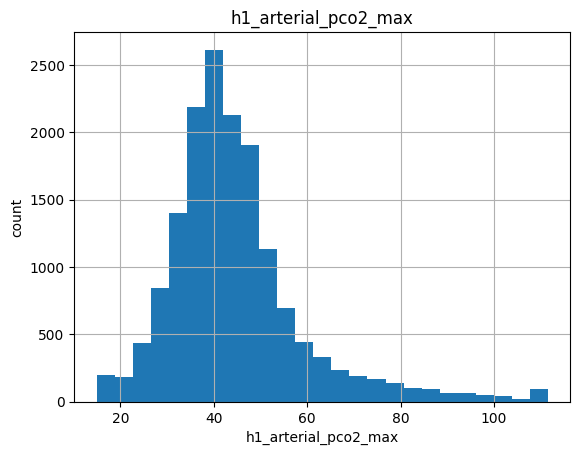

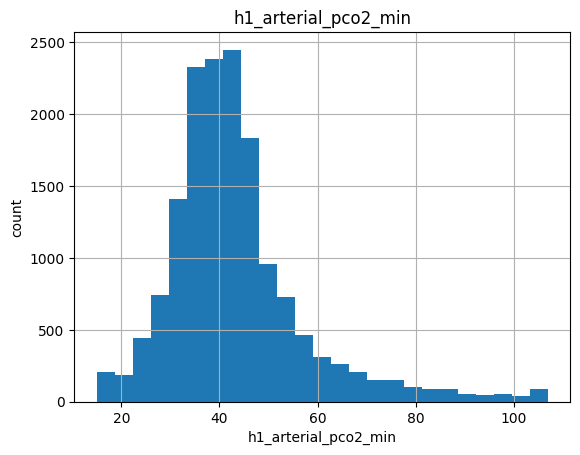

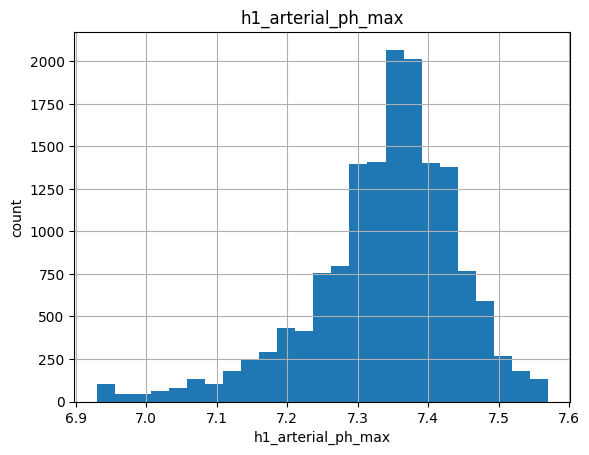

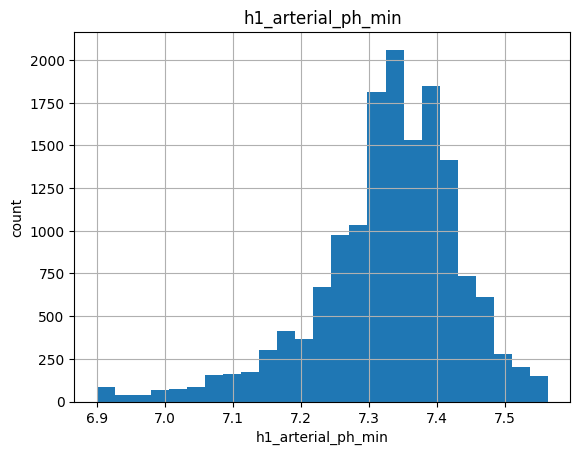

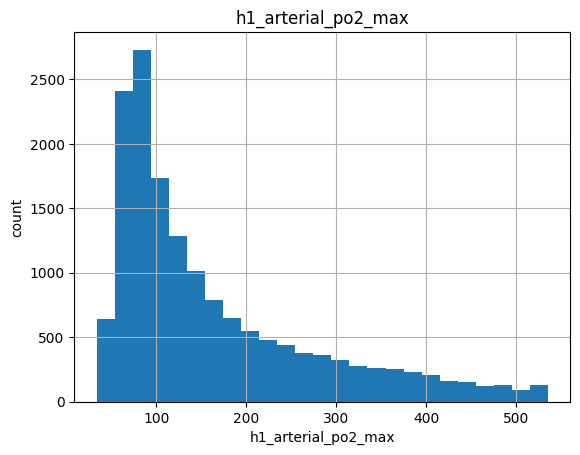

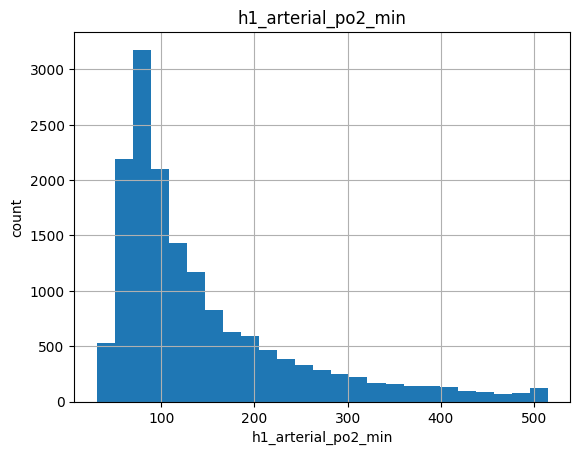

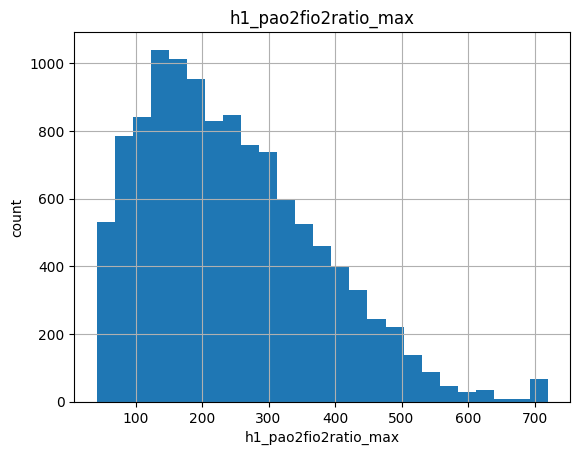

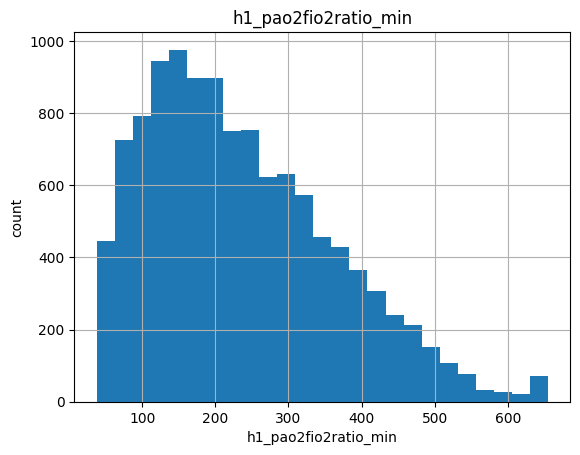

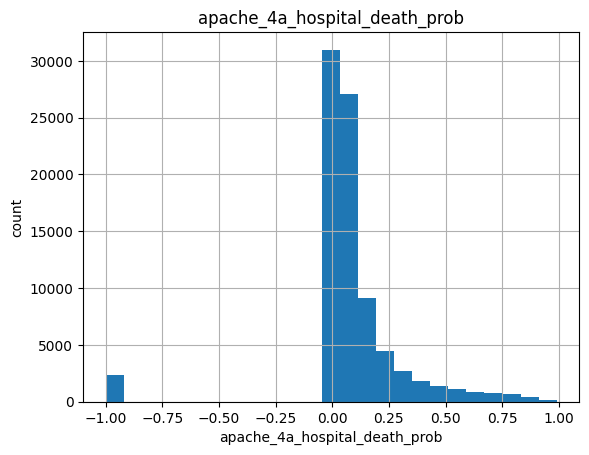

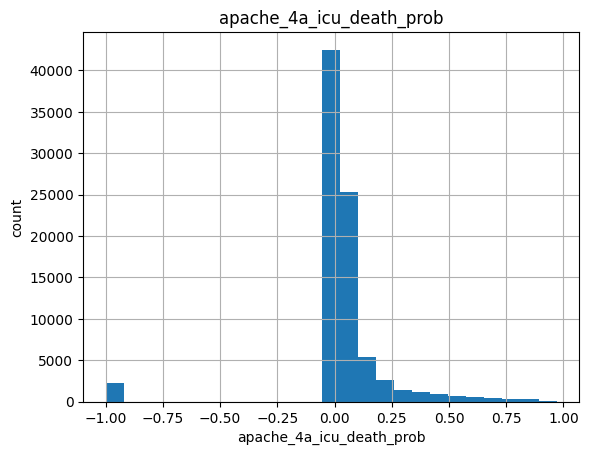

In [7]:
# lets analyse the continous values by creating histograms to understand the data 

for features in continous_features:
    data = dataset.copy()
    data[features].hist(bins=25)
    plt.xlabel(features)
    plt.ylabel("count")
    plt.title(features)
    plt.show()

categorical features

In [8]:
categorical_features = [features for features in dataset.columns if dataset[features].dtype=='O']
print(len(categorical_features))

8


In [9]:
for features in categorical_features:
    print(f"The feature is {features} and number of categories are {len(dataset[features].unique())}")

The feature is ethnicity and number of categories are 7
The feature is gender and number of categories are 3
The feature is hospital_admit_source and number of categories are 16
The feature is icu_admit_source and number of categories are 6
The feature is icu_stay_type and number of categories are 3
The feature is icu_type and number of categories are 8
The feature is apache_3j_bodysystem and number of categories are 12
The feature is apache_2_bodysystem and number of categories are 11


# Feature Engineering

missing values


In [10]:
c_features_na = [features for features in dataset.columns if dataset[features].isnull().sum()>=1 and dataset[features].dtype=='O']

print(len(c_features_na))

6


In [11]:
def replace_cat_features(dataset,c_features_na):
    data = dataset.copy()
    data[features] = data[features].fillna('Missing')
    return data


dataset = replace_cat_features(dataset,c_features_na)

dataset.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


In [12]:
n_features_na = [features for features in dataset.columns if dataset[features].isnull().sum()>=1 and dataset[features].dtype!='O']

for features in n_features_na:
    if(np.round(dataset[features].isnull().mean(),4) > 0.5 ):
        print(features)

albumin_apache
bilirubin_apache
fio2_apache
paco2_apache
paco2_for_ph_apache
pao2_apache
ph_apache
urineoutput_apache
d1_diasbp_invasive_max
d1_diasbp_invasive_min
d1_mbp_invasive_max
d1_mbp_invasive_min
d1_sysbp_invasive_max
d1_sysbp_invasive_min
h1_diasbp_invasive_max
h1_diasbp_invasive_min
h1_mbp_invasive_max
h1_mbp_invasive_min
h1_sysbp_invasive_max
h1_sysbp_invasive_min
d1_albumin_max
d1_albumin_min
d1_bilirubin_max
d1_bilirubin_min
d1_inr_max
d1_inr_min
d1_lactate_max
d1_lactate_min
h1_albumin_max
h1_albumin_min
h1_bilirubin_max
h1_bilirubin_min
h1_bun_max
h1_bun_min
h1_calcium_max
h1_calcium_min
h1_creatinine_max
h1_creatinine_min
h1_glucose_max
h1_glucose_min
h1_hco3_max
h1_hco3_min
h1_hemaglobin_max
h1_hemaglobin_min
h1_hematocrit_max
h1_hematocrit_min
h1_inr_max
h1_inr_min
h1_lactate_max
h1_lactate_min
h1_platelets_max
h1_platelets_min
h1_potassium_max
h1_potassium_min
h1_sodium_max
h1_sodium_min
h1_wbc_max
h1_wbc_min
d1_arterial_pco2_max
d1_arterial_pco2_min
d1_arterial_ph_m

In [13]:
for features in n_features_na:
    median_values = dataset[features].median()
    dataset[features] = dataset[features].fillna(median_values)


print(dataset[n_features_na].isnull().sum())

age                            0
bmi                            0
height                         0
weight                         0
albumin_apache                 0
                              ..
hepatic_failure                0
immunosuppression              0
leukemia                       0
lymphoma                       0
solid_tumor_with_metastasis    0
Length: 169, dtype: int64


# Feature selection


In [14]:
dataset.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.950000,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.640000,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,27.654655,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


,hospital_death
hospital_death,1.000000
d1_lactate_max,0.309711
d1_lactate_min,0.309619
apache_4a_hospital_death_prob,0.300259
apache_4a_icu_death_prob,0.274050
ventilated_apache,0.226405
fio2_apache,0.185295


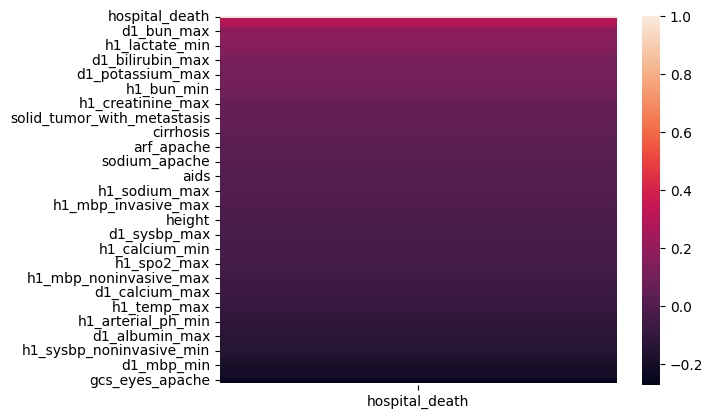

In [15]:
corr = dataset.corr()[['hospital_death']].sort_values(by='hospital_death',ascending=False)

sns.heatmap(corr)
corr.head(7)

In [16]:
x = [ 'age' , 'weight' , 'bmi' , 'gender','d1_lactate_max' , 'd1_lactate_min' , 'apache_4a_hospital_death_prob','apache_4a_icu_death_prob' ]

dataset['gender'] = dataset['gender'].replace({'M':0 , 'F':1})

In [17]:
nan_x_features = [features for features in x if dataset[features].isnull().sum()>=1]
print(nan_x_features)
dataset['gender'].fillna(1)

['gender']


0        0.0
1        1.0
2        1.0
3        1.0
4        0.0
        ... 
91708    0.0
91709    1.0
91710    0.0
91711    1.0
91712    1.0
Name: gender, Length: 91713, dtype: float64

In [18]:
dataset['gender'].fillna(1)

0        0.0
1        1.0
2        1.0
3        1.0
4        0.0
        ... 
91708    0.0
91709    1.0
91710    0.0
91711    1.0
91712    1.0
Name: gender, Length: 91713, dtype: float64

# Model building and selection 

In [19]:
# selecting the dependent and independent features
from sklearn.preprocessing import MinMaxScaler,StandardScaler

t_x = dataset[x]
t_y = dataset['hospital_death']

t_x['gender'] = t_x['gender'].fillna(0)

C:\Users\91976\AppData\Local\Temp\ipykernel_21136\3264565019.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_x['gender'] = t_x['gender'].fillna(0)


In [23]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(t_x,t_y , train_size=0.95)

test_x.head()

test_x.fillna(0)
train_x.fillna(0)

print(test_x.isnull().sum())
print(train_x.isnull().sum())

age                              0
weight                           0
bmi                              0
gender                           0
d1_lactate_max                   0
d1_lactate_min                   0
apache_4a_hospital_death_prob    0
apache_4a_icu_death_prob         0
dtype: int64
age                              0
weight                           0
bmi                              0
gender                           0
d1_lactate_max                   0
d1_lactate_min                   0
apache_4a_hospital_death_prob    0
apache_4a_icu_death_prob         0
dtype: int64


In [24]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from scipy.stats import randint


#model = XGBClassifier(reg_lambda=1.6, reg_alpha=0.8, n_estimators=150, max_depth=6, learning_rate=0.06, gamma=6.4)


model = Pipeline([('scalar',MinMaxScaler()),
                   ('xgboost', XGBClassifier(reg_lambda=1.6, reg_alpha=0.8, n_estimators=150, max_depth=6, learning_rate=0.06, gamma=6.4))])




#param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
#              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],

#              'max_depth': [5,6,7,8,9,10,11,12,13,14],
#              'n_estimators': [50,65,80,100,115,130,150],
#              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
#              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}


#random_cv = RandomizedSearchCV(estimator=model,
#            param_distributions=param_grid,
#            cv=5, n_iter=50,
#            scoring = 'roc_auc',n_jobs = 4
#            )


#search = random_cv.fit(train_x,train_y)

#print(search.best_params_)


In [25]:
model.fit(train_x,train_y) 
pred = model.predict(test_x)

print(pred)

acc = accuracy_score(pred,test_y)
auc_acc = roc_auc_score(pred,test_y)
print(acc)
print(auc_acc)


from sklearn.metrics import confusion_matrix
print("For confusion matrix")
print(confusion_matrix(test_y , pred))


from sklearn.metrics import classification_report
print("For classification report:")
print(classification_report(test_y , pred))




[0 0 0 ... 0 0 0]
0.9208460532054078
0.8115222299340241
For confusion matrix
[[4125   43]
 [ 320   98]]
For classification report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4168
           1       0.70      0.23      0.35       418

    accuracy                           0.92      4586
   macro avg       0.81      0.61      0.65      4586
weighted avg       0.91      0.92      0.90      4586



In [26]:
import pickle 

with open("Model.pkl",'wb') as file:
    pickle.dump(model,file)